# Notebook: 2
<hr>




![Alt text](3-tricks-that-car-salesmen-use-to-take-your-money_twitter_card_800x320_v20230104094542.jpg)

<br>

<hr> 

### Nathan Collins

##### **ID:** 12062131

<hr>
<br>

# Data Preprocessing and Exploration

> # Description

The business objective stems from a binary classification problem. 

I am tasked to construct a model that can predict if whether an existing customer is more likely to buy a new car. 

The results of the model can be applied for targeting leads for a marketing campaign.

<br>
<br>

 # Importing the Libraries into a Dataframe

In [1]:
# Import relevant libraries for data analysis and visualisation.

# General libraries
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import missingno as msno
import altair as alt

# Statistical learning models, preprocessing and metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Other
from scipy.stats import pearsonr
from scipy.stats import mode

# Dismissing Warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Import the dataset and store it in a dataframe called 'cars_df'.

cars_df = pd.read_csv('https://raw.githubusercontent.com/modernth3ory/repurchase_train.csv/main/repurchase_training.csv')

<br>
<br>
<br>
<br>
<br>
<br>
<br>

 # Exploring the Dataset

In [3]:
# Display the first 5 rows of the dataframe.

cars_df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [4]:
# Display the last 5 rows of the dataframe.

cars_df.tail()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10
131336,154139,1,NaN,NaN,model_1,LCV,6,1,7,1,10,10,5,3,4,9,10


In [5]:
# Display the shape of the dataframe.

cars_df.shape

(131337, 17)

In [6]:
# Display the summary statistics of the dataframe.

cars_df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
# Display the information about the dataframe.

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

> ##### Insights

- The dataset contains [ **17** ] columns.

- Dataset contains both categorical and numerical variables, with NaN values in [ **2** ] columns, [ **age_band** and **gender** ].

- The columns containing object variables are: [ **age_band, gender, car_model, car_segment** ]. 

- All remaining features are [ **int64** ] variables.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


 # Data Cleaning


### Determine if there are any duplicate rows in the dataset and remove them.

In [8]:
# Drop the ID column from the dataframe.

cars_df.drop('ID', axis=1, inplace=True)

# Determine whether the data contains any duplicate entries.

duplicates = cars_df.duplicated().sum()
print("Number of duplicated entries:", duplicates)

Number of duplicated entries: 2726


[ 2726 ] duplicate entries detected. 

Removal of these entries is paramount, as it may create bias in the model and result in inaccuracy. 

Removal does not account for any information loss.

<br>
<br>


In [9]:
# Drop duplicate entries.
cars_df.drop_duplicates(inplace=True)

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Determine which columns contain NaN values and amend them.

In [10]:
# Display the missing values in the dataset.

cars_df.isnull().sum()

# Create a null table with number of nans and percentage of nans.

null_table = pd.DataFrame(cars_df.isnull().sum().sort_values(ascending=False))
null_table.columns = ['Number of NaNs']
null_table['Percentage of NaNs'] = null_table['Number of NaNs'] / len(cars_df) * 100
null_table


,Number of NaNs,Percentage of NaNs
age_band,109668,85.271089
gender,67455,52.448857
Target,0,0.000000
car_model,0,0.000000
car_segment,0,0.000000
age_of_vehicle_years,0,0.000000
sched_serv_warr,0,0.000000
non_sched_serv_warr,0,0.000000
sched_serv_paid,0,0.000000
non_sched_serv_paid,0,0.000000


<AxesSubplot:>

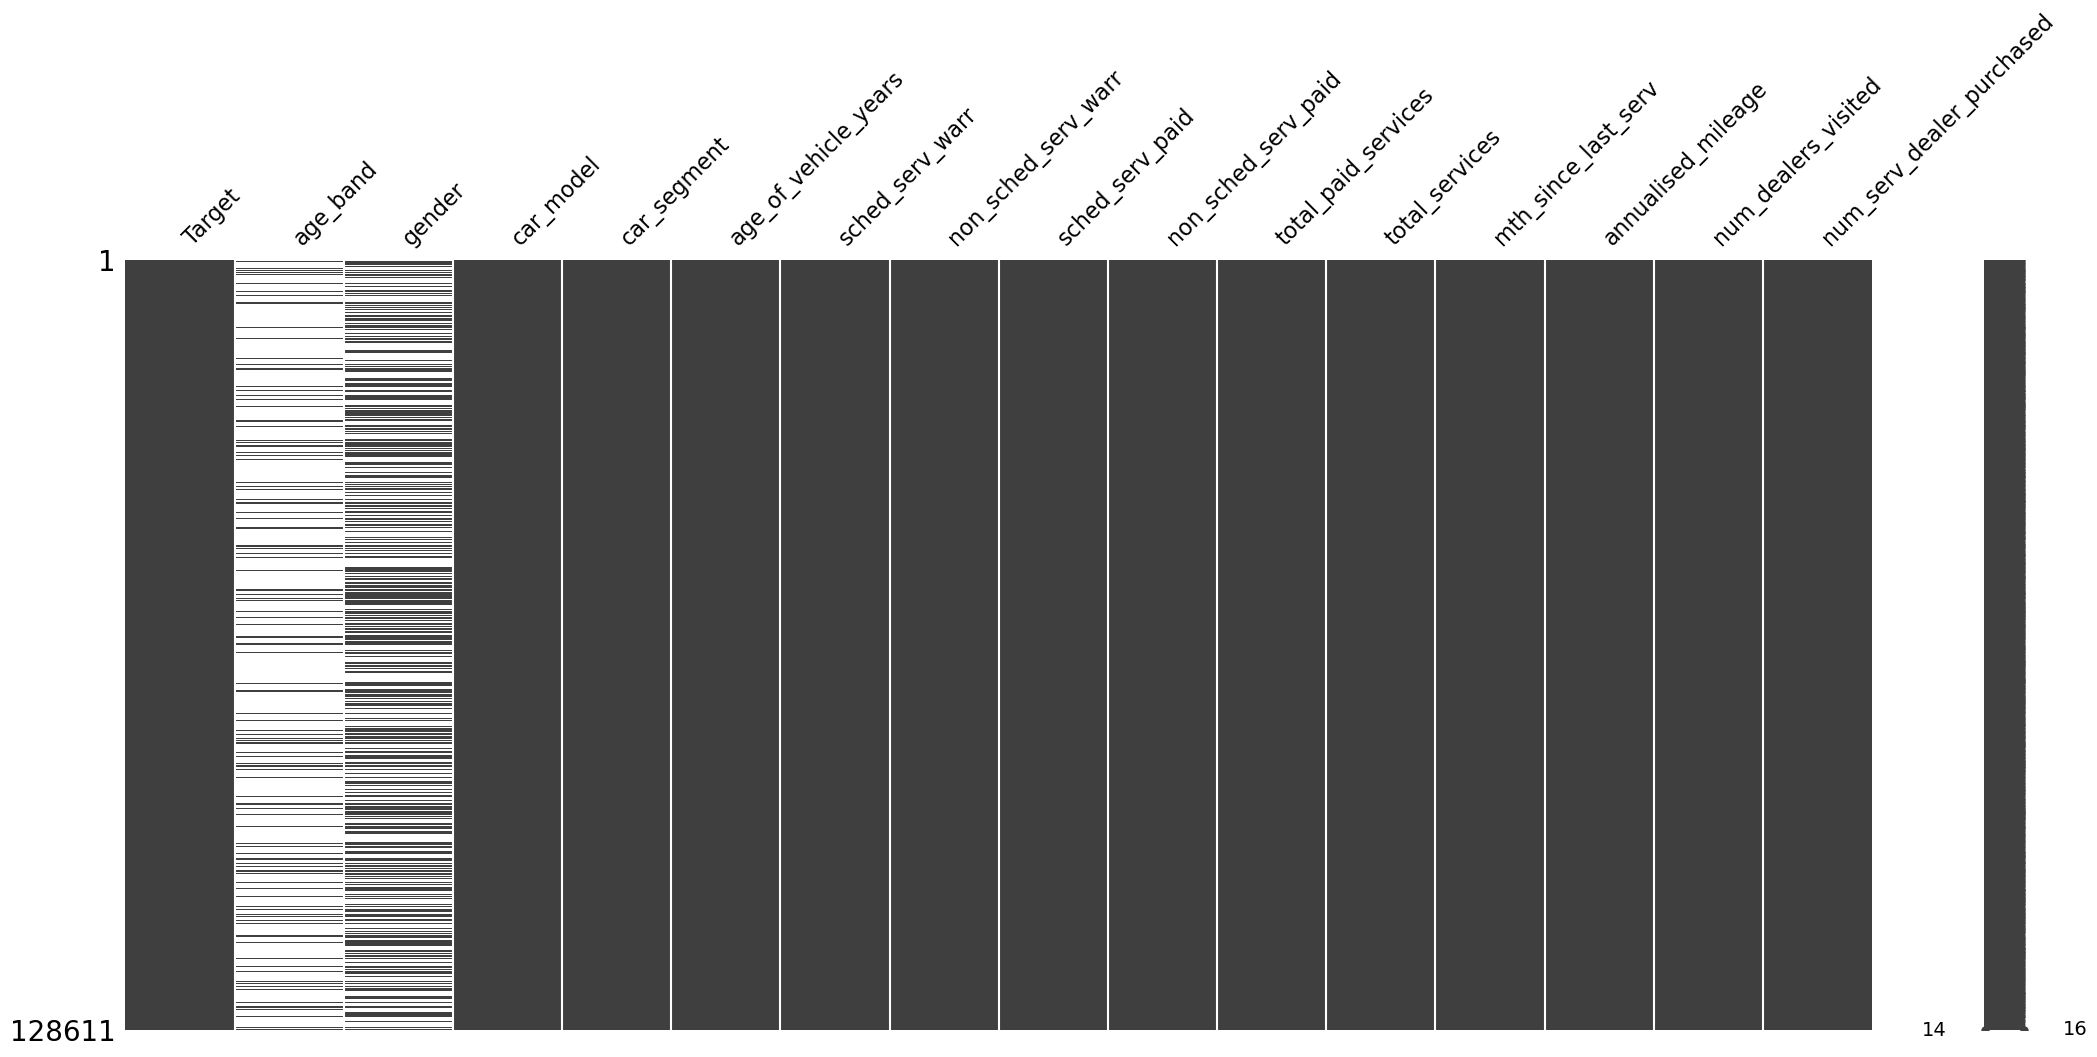

In [11]:
# Visualise missing values in the dataframe using missingno library.

msno.matrix(cars_df)

Since age_band and gender may provide important insights during modelling, retaining these features will be prioritised in a separate dataframe.

<br>
<br>

In [12]:
# Display the age_band column.

cars_df['age_band'].value_counts()

4. 45 to 54    4051
3. 35 to 44    3830
2. 25 to 34    3546
5. 55 to 64    3392
6. 65 to 74    2138
7. 75+         1019
1. <25          967
Name: age_band, dtype: int64

In [13]:
# Display the gender column.

cars_df['gender'].value_counts()

Male      35440
Female    25716
Name: gender, dtype: int64

<br>
<br>
<br>

## Creating the two cleaned dataframes: 

- `[ cars_df ] with all columns`

- `[ cars_df ] with no age and gender columns`

<br>

In [14]:
# Make a copy of original dataset for cleaning.

cars_df_clean = cars_df.copy()

### Convert all categorical (nominal) features into numerical (ordinal) features.

In [15]:
# Display the information about the current dataframe.

cars_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128611 entries, 0 to 131336
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Target                     128611 non-null  int64 
 1   age_band                   18943 non-null   object
 2   gender                     61156 non-null   object
 3   car_model                  128611 non-null  object
 4   car_segment                128611 non-null  object
 5   age_of_vehicle_years       128611 non-null  int64 
 6   sched_serv_warr            128611 non-null  int64 
 7   non_sched_serv_warr        128611 non-null  int64 
 8   sched_serv_paid            128611 non-null  int64 
 9   non_sched_serv_paid        128611 non-null  int64 
 10  total_paid_services        128611 non-null  int64 
 11  total_services             128611 non-null  int64 
 12  mth_since_last_serv        128611 non-null  int64 
 13  annualised_mileage         128611 non-null  

In [16]:
# Create a new dataframe called 'cars_NAG' by dropping the 'age_band' and 'gender' columns.

cars_NAG = cars_df_clean.drop(['age_band', 'gender'], axis=1)

# Display the shape of the new dataframe.

cars_NAG.shape


(128611, 14)

#### Create a new dataframe without NaN values, while retaining the age and gender columns.

In [17]:
# Create a new dataframe called 'cars_ALL' which contains all rows with no missing values.

cars_ALL = cars_df_clean.dropna()

# Display the shape of the new dataframe.

cars_ALL.shape


(18289, 16)

#### Convert the "age_band" column in the "cars_NAG" dataset into numerical variables.

<AxesSubplot:xlabel='age_band', ylabel='count'>

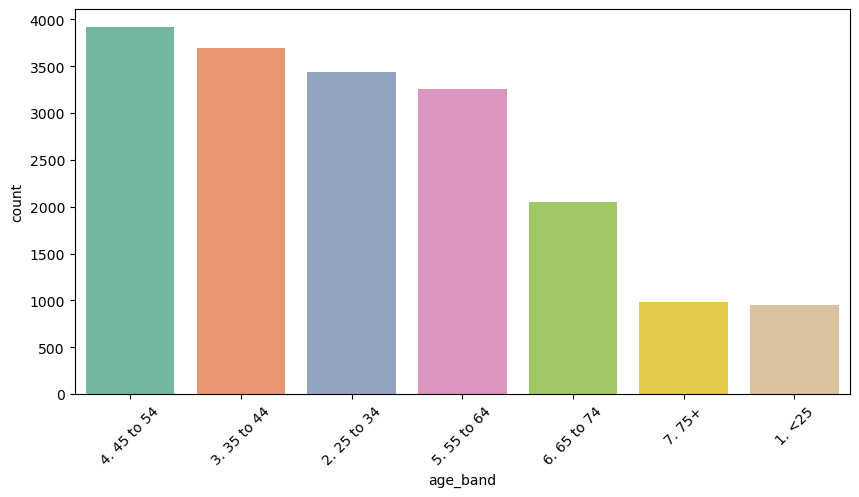

In [18]:
# Visualise the distribution of the 1. <25, 2. 25-34, 3. 35-44, 4. 45-54, 5. 55-64, 6. 65-74, 7. 75+ age bands. Rotate the x-axis labels by 45 degrees. Order the age bands from lowest to highest.

plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.countplot(x=cars_ALL['age_band'], order=cars_ALL['age_band'].value_counts().index, palette='Set2')

In [19]:
# Display the age band column.

cars_ALL['age_band'].value_counts()

# Convert the age_band column to numerical values using one hot encoding.

cars_ALL = pd.concat([cars_ALL, pd.get_dummies(cars_ALL['age_band'])], axis=1)

# Delete the age_band column.

del cars_ALL['age_band']

# Display the first 5 rows of the new dataframe.

cars_ALL.head()

,Target,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,...,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,1. <25,2. 25 to 34,3. 35 to 44,4. 45 to 54,5. 55 to 64,6. 65 to 74,7. 75+
0,0,Male,model_1,LCV,9,2,10,3,7,5,...,8,10,4,0,0,1,0,0,0,0
6,0,Male,model_3,Large/SUV,8,2,8,2,9,9,...,6,10,4,1,0,0,0,0,0,0
34,0,Female,model_2,Small/Medium,5,10,6,9,7,8,...,9,3,10,0,1,0,0,0,0,0
38,0,Female,model_2,Small/Medium,7,8,2,8,2,5,...,9,7,7,0,0,0,1,0,0,0
51,0,Female,model_7,LCV,6,4,4,4,6,5,...,10,7,1,0,1,0,0,0,0,0


#### Convert the "gender" column in the "cars_ALL" dataset into numerical variables.

In [20]:
# Display the gender column.

cars_ALL['gender'].value_counts()

# Convert the gender column to numerical values using one hot encoding.

cars_ALL = pd.concat([cars_ALL, pd.get_dummies(cars_ALL['gender'])], axis=1)

# Delete the gender column.

del cars_ALL['gender']

# Display the first 5 rows of the new dataframe.

cars_ALL.head()


,Target,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,...,num_serv_dealer_purchased,1. <25,2. 25 to 34,3. 35 to 44,4. 45 to 54,5. 55 to 64,6. 65 to 74,7. 75+,Female,Male
0,0,model_1,LCV,9,2,10,3,7,5,6,...,4,0,0,1,0,0,0,0,0,1
6,0,model_3,Large/SUV,8,2,8,2,9,9,4,...,4,1,0,0,0,0,0,0,0,1
34,0,model_2,Small/Medium,5,10,6,9,7,8,9,...,10,0,1,0,0,0,0,0,1,0
38,0,model_2,Small/Medium,7,8,2,8,2,5,6,...,7,0,0,0,1,0,0,0,1,0
51,0,model_7,LCV,6,4,4,4,6,5,4,...,1,0,1,0,0,0,0,0,1,0


#### Convert the "car_model" column in both dataframes, into numerical variables.

In [21]:
# Remove the "model_" string in the car_model column, of both dataframes.

cars_ALL['car_model'] = cars_ALL['car_model'].str.replace('model_', '')
cars_NAG['car_model'] = cars_NAG['car_model'].str.replace('model_', '')

# Convert the car_model column to numerical values.

cars_ALL['car_model'] = pd.to_numeric(cars_ALL['car_model'])
cars_NAG['car_model'] = pd.to_numeric(cars_NAG['car_model'])

#### Convert the "car_segment" column in both dataframes, into numerical variables.

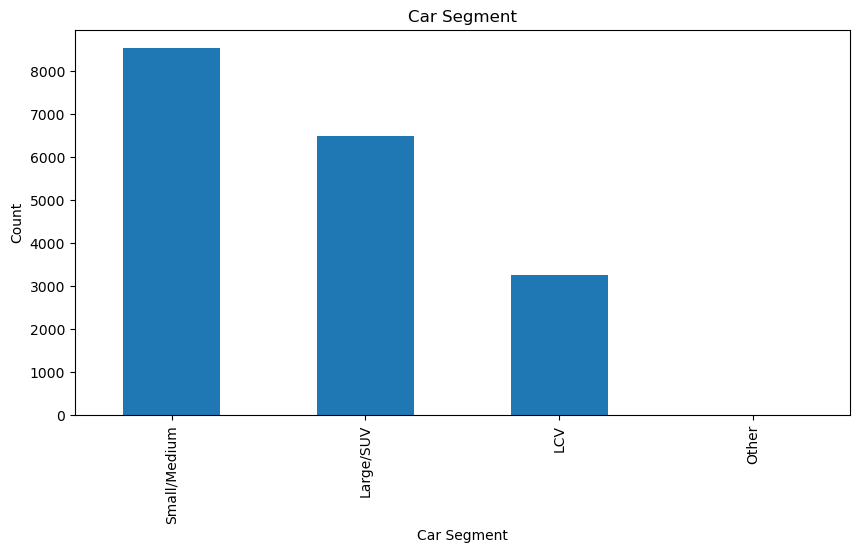

In [22]:
# Display the car_segment column as a bar chart.

cars_ALL['car_segment'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Car Segment'), 
plt.xlabel('Car Segment'), 
plt.ylabel('Count'), 
plt.show()


In [23]:
# Count the number of other cars in the car_segment column.

cars_ALL['car_segment'].value_counts()['Other']

2

In [24]:
# Convert the car_segment column in both dataframes to numerical values using one hot encoding.

cars_ALL = pd.concat([cars_ALL, pd.get_dummies(cars_ALL['car_segment'])], axis=1)
cars_NAG = pd.concat([cars_NAG, pd.get_dummies(cars_NAG['car_segment'])], axis=1)

# Delete the car_segment column in both dataframes.

del cars_ALL['car_segment']
del cars_NAG['car_segment']

In [25]:
# Display the range of features in both dataframes.

cars_ALL.describe().loc[["min", "max"],:]

,Target,car_model,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,4. 45 to 54,5. 55 to 64,6. 65 to 74,7. 75+,Female,Male,LCV,Large/SUV,Other,Small/Medium
min,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,18.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
# Sort all possible values for every numerical feature in the dataset.

for column in cars_ALL.select_dtypes(include=['int64']).columns:
    print(sorted(cars_ALL[column].unique()))

[0, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [27]:
# Display the range of features in both dataframes.

cars_NAG.describe().loc[["min", "max"],:]

,Target,car_model,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,LCV,Large/SUV,Other,Small/Medium
min,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
max,1.0,19.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.0,1.0,1.0


In [28]:
# Sort all possible values for every numerical feature in the dataset.

for column in cars_NAG.select_dtypes(include=['int64']).columns:
    print(sorted(cars_NAG[column].unique()))

[0, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


> ##### Insights

There are now two dataframes to work with:

- `cars_ALL` retains all features, minus the rows with `NaN values`. 

- Age and gender were deemed important features, and thus were not removed. The only caveat, is there are significantly less rows in this dataframe.

- `cars_NAG` removes columns `age_band` and `gender`. 

- This provides more rows to work with, but at the cost of losing some important features.

<br>

This approach was selected, as it is believed age and gender may play an influential role in the decision to buy a new car.

The dataset is now considered clean.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


 # Exploratory Data Analysis


### Visualising correlations between features and the target variable.

<AxesSubplot:>

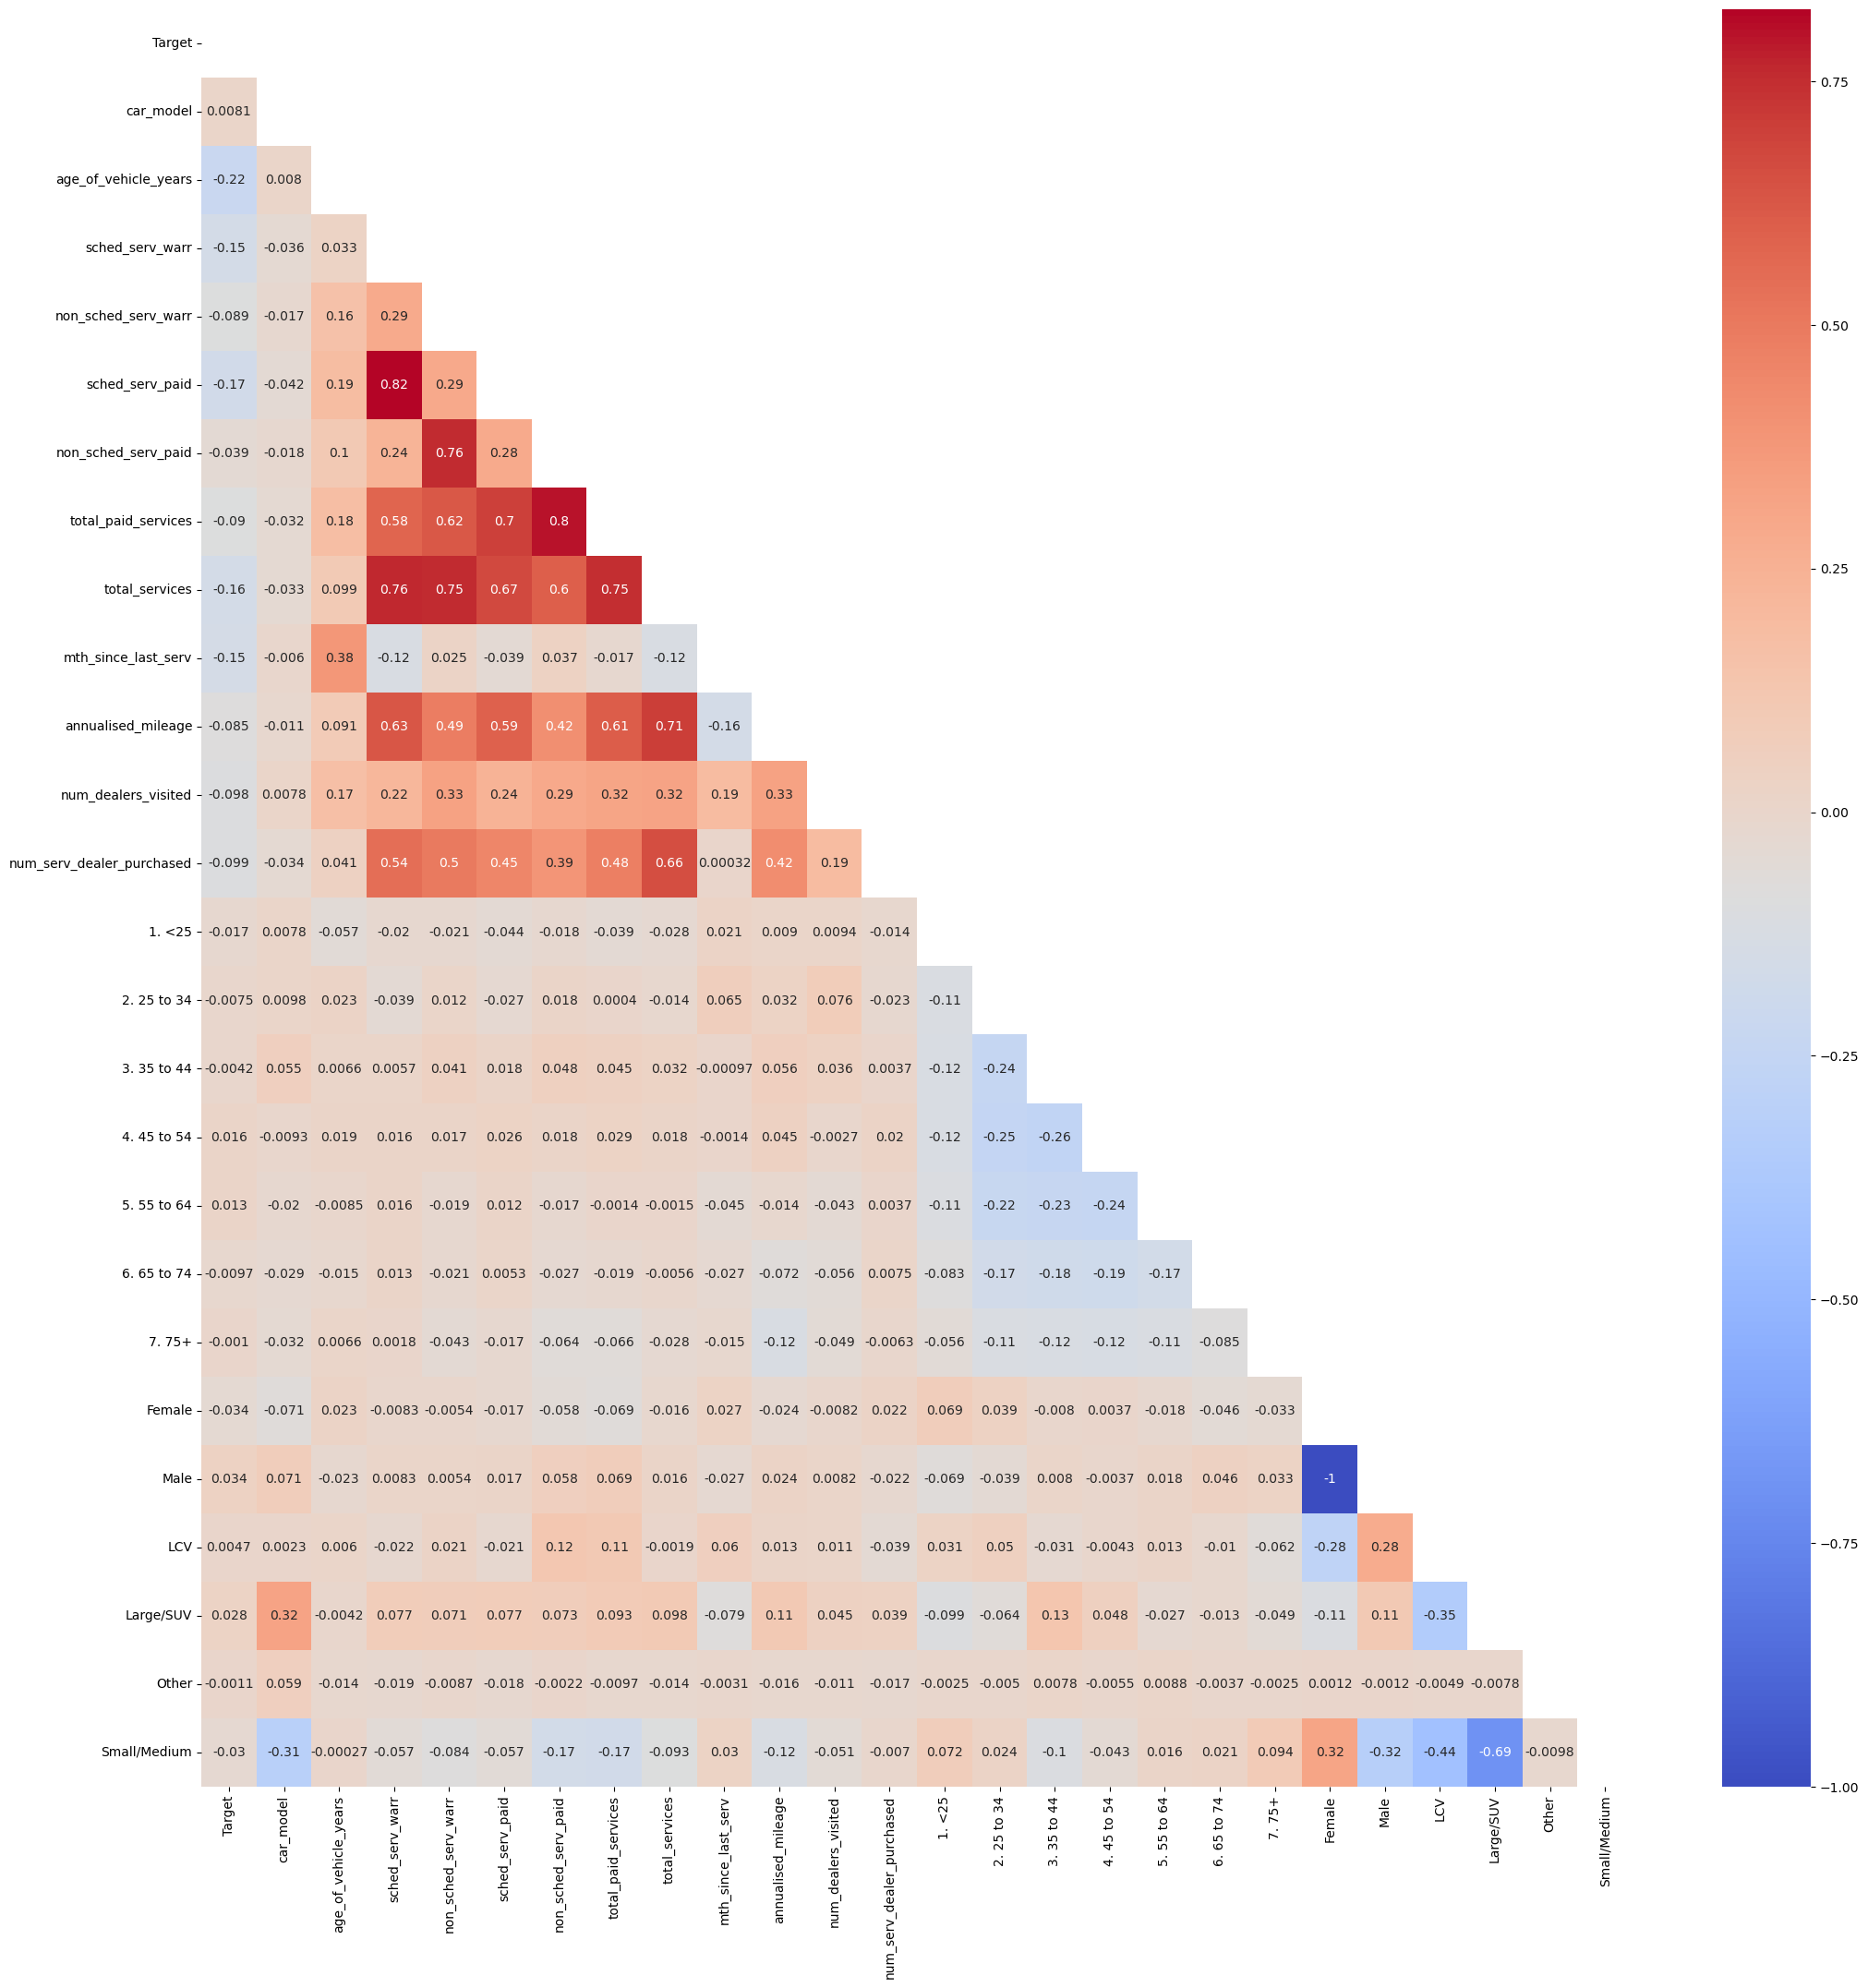

In [29]:
# Visualise correlation between the features using a heatmap.
corr= cars_ALL.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=matrix)

In [30]:
# Display the highest correlated features of both dataframe, with the Target.

# Calculate the correlation between Target and all features in cars_ALL
corr_ALL = cars_ALL.corr()['Target'].sort_values(ascending=False)

# Create a DataFrame with the 10 most correlated features in cars_ALL
df_ALL = pd.DataFrame({'cars_ALL': corr_ALL.index[:11], 'correlation_ALL': corr_ALL.values[:11]})

# Calculate the correlation between Target and all features in cars_NAG
corr_NAG = cars_NAG.corr()['Target'].sort_values(ascending=False)

# Create a DataFrame with the 10 most correlated features in cars_NAG
df_NAG = pd.DataFrame({'cars_NAG': corr_NAG.index[:11], 'correlation_NAG': corr_NAG.values[:11]})

# Concatenate the two DataFrames to create a new DataFrame with 4 columns
df_corr = pd.concat([df_ALL, df_NAG], axis=1)

# Print the resulting DataFrame
print(df_corr)

       cars_ALL  correlation_ALL                   cars_NAG  correlation_NAG
0        Target         1.000000                     Target         1.000000
1          Male         0.033980                  Large/SUV         0.015211
2     Large/SUV         0.027986                        LCV         0.010342
3   4. 45 to 54         0.016244                  car_model         0.000575
4   5. 55 to 64         0.013153                      Other        -0.001319
5     car_model         0.008100               Small/Medium        -0.023228
6           LCV         0.004723        non_sched_serv_paid        -0.033297
7        7. 75+        -0.001011        num_dealers_visited        -0.053589
8         Other        -0.001083  num_serv_dealer_purchased        -0.058963
9   3. 35 to 44        -0.004205         annualised_mileage        -0.080251
10  2. 25 to 34        -0.007470        non_sched_serv_warr        -0.088442


> ##### Insights

- Correlations in both dataframes between features and the target variable are very weak.

- While `cars_ALL` contains `~110,000` less rows than `cars_NAG`, key features removed in `cars_NAG` do appear to have stronger correlations with the target variable. For example, Males and age brackets 45 to 54 and 55 to 64 are more likely to buy a new car.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the cohort of customers who have bought a new car.

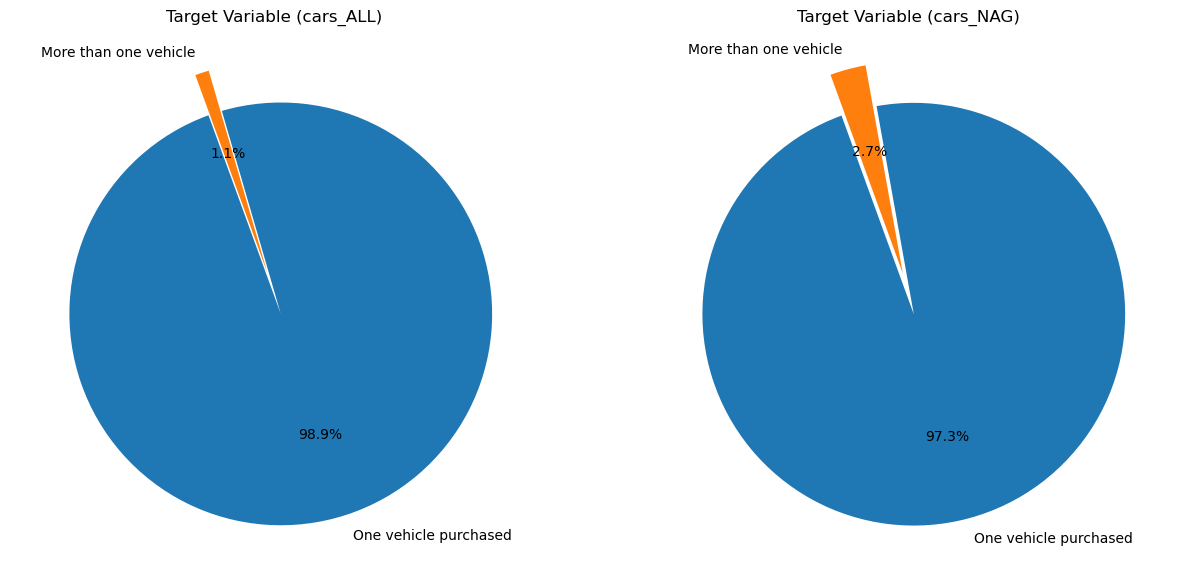

In [31]:
# Visualise the target variable in both cars_ALL and cars_NAG using a pie chart.

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
cars_ALL['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=110, explode=(0.1, 0.1), labels=['One vehicle purchased', 'More than one vehicle'], ax=ax[0]), ax[0].set_title('Target Variable (cars_ALL)'), ax[0].set_ylabel('')
cars_NAG['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=110, explode=(0.1, 0.1), labels=['One vehicle purchased', 'More than one vehicle'], ax=ax[1]), ax[1].set_title('Target Variable (cars_NAG)'), ax[1].set_ylabel('')
plt.show()

In [32]:
# Count the number of rows where the target variable is equal to 1.

Cohort1 = cars_ALL['Target'].value_counts()[1]
Cohort2 = cars_NAG['Target'].value_counts()[1]

# Calculate the percentage of the target variable in both dataframes.

print('Target audience of cars_ALL:', Cohort1)
print('Percentage of Target in cars_ALL:', Cohort1 / len(cars_ALL) * 100, '%', '\n')
print('Target audience of cars_NAG:', Cohort2)
print('Percentage of Target in cars_NAG:', Cohort2 / len(cars_NAG) * 100, '%')

Target audience of cars_ALL: 194
Percentage of Target in cars_ALL: 1.0607468970419376 % 

Target audience of cars_NAG: 3521
Percentage of Target in cars_NAG: 2.7377129483481197 %


> ##### Insights

- The cohort of interest only represents a low percentage of the total dataset.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the interests of the cohort.

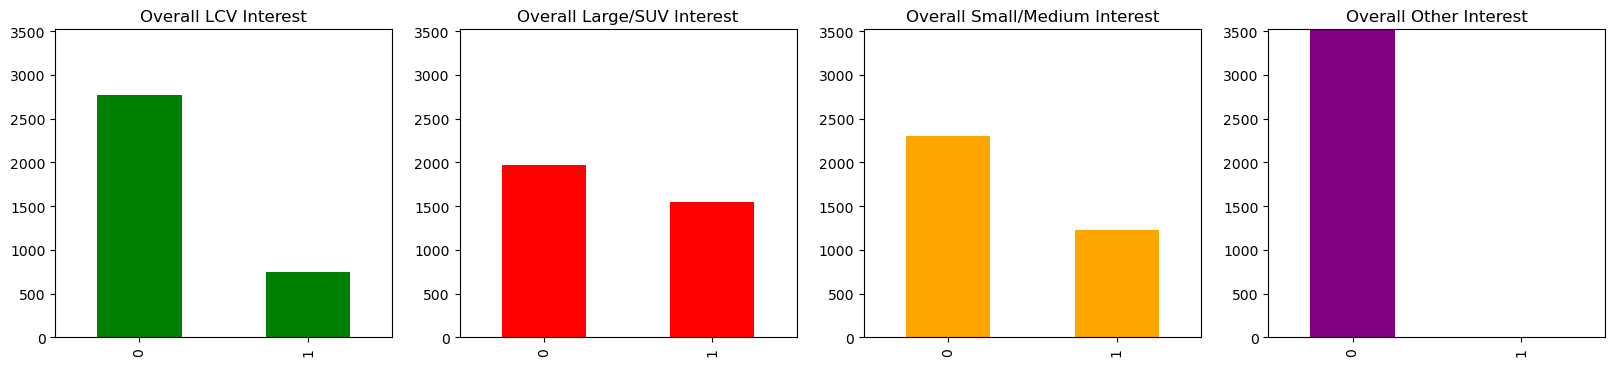

In [33]:
# For cars_NAG rows with a Target value of 1, visualise the car_model and 'LCV', 'Large/SUV', 'Small/Medium', 'Other' columns in separate bar charts.
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

max_y = max(cars_NAG[cars_NAG['Target'] == 1]['LCV'].value_counts().max(),
            cars_NAG[cars_NAG['Target'] == 1]['Large/SUV'].value_counts().max(),
            cars_NAG[cars_NAG['Target'] == 1]['Small/Medium'].value_counts().max(),
            cars_NAG[cars_NAG['Target'] == 1]['Other'].value_counts().max())

for j in range(4):
    ax[j].set_ylim([0, max_y])

cars_NAG[cars_NAG['Target'] == 1]['LCV'].value_counts().plot(kind='bar', ax=ax[0], title='Overall LCV Interest', color='green')
cars_NAG[cars_NAG['Target'] == 1]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[1], title='Overall Large/SUV Interest', color='red')
cars_NAG[cars_NAG['Target'] == 1]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[2], title='Overall Small/Medium Interest', color='orange')
cars_NAG[cars_NAG['Target'] == 1]['Other'].value_counts().plot(kind='bar', ax=ax[3], title='Overall Other Interest', color='purple')

plt.show()

<AxesSubplot:title={'center':'Female Other Interest'}>

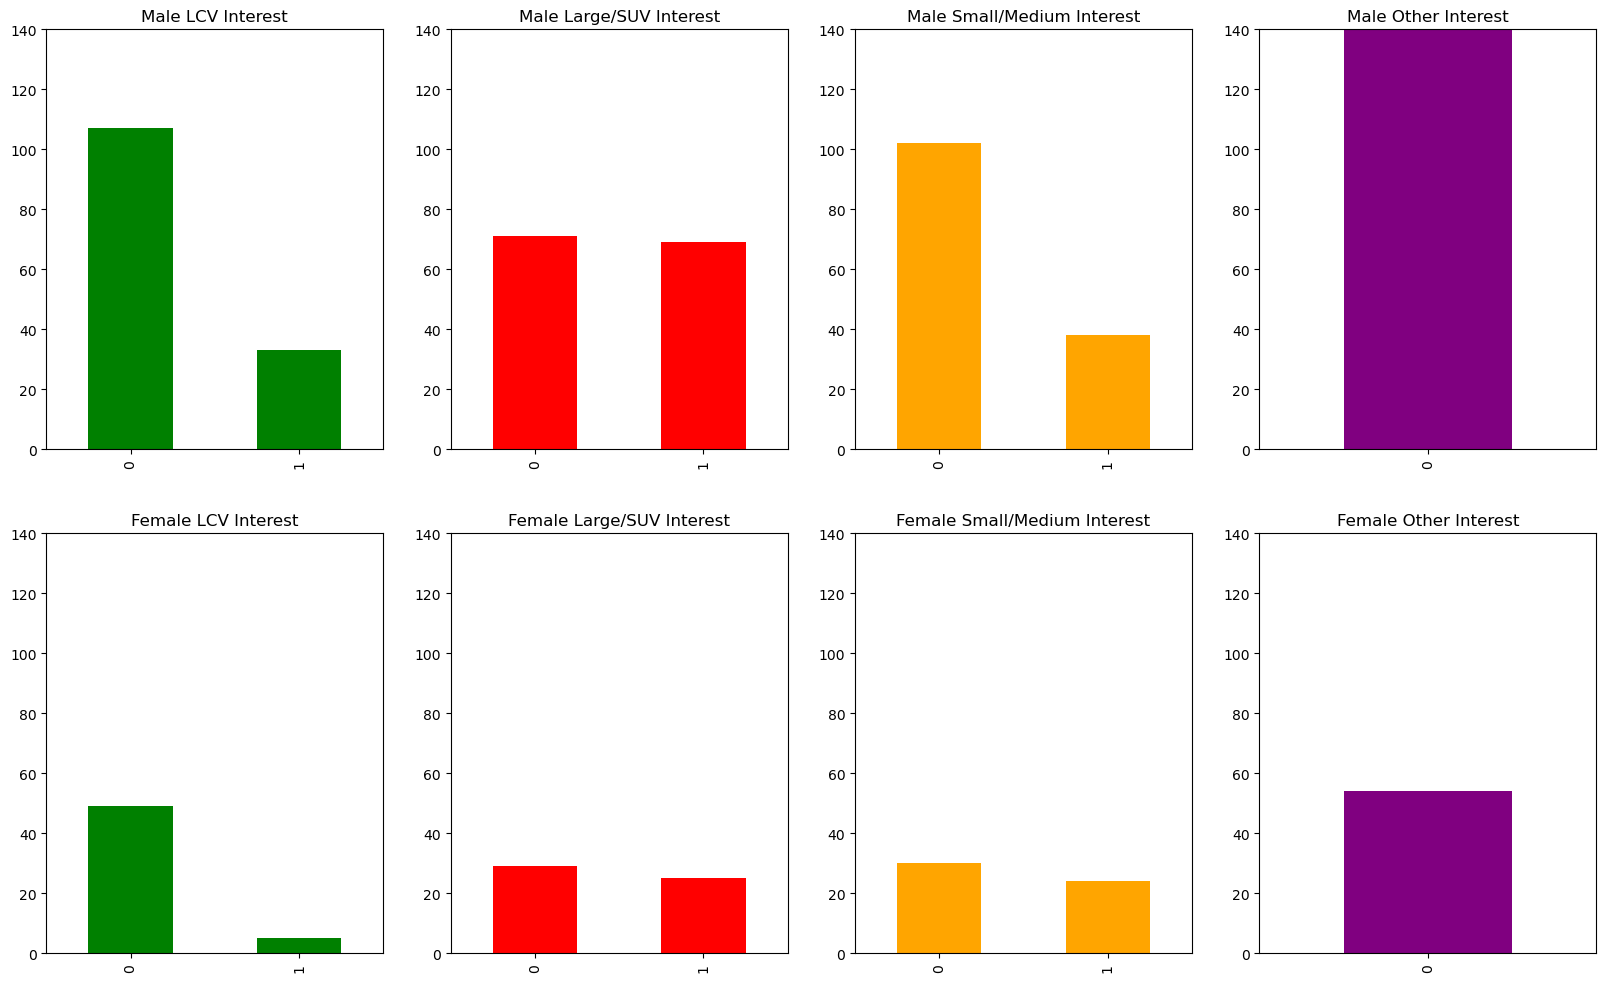

In [34]:
# For cars_ALL rows with a Target value of 1, visualise the car_model and 'LCV', 'Large/SUV', 'Small/Medium', 'Other' columns between genders, in separate bar charts.
fig, ax = plt.subplots(2, 4, figsize=(20, 12))

max_y = max(cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['LCV'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Large/SUV'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Small/Medium'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Other'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['LCV'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Large/SUV'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Small/Medium'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Other'].value_counts().max())

for i in range(2):
    for j in range(4):
        ax[i][j].set_ylim([0, max_y])

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[0][0], title='Male LCV Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[0][1], title='Male Large/SUV Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[0][2], title='Male Small/Medium Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[0][3], title='Male Other Interest', color='purple')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[1][0], title='Female LCV Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[1][1], title='Female Large/SUV Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[1][2], title='Female Small/Medium Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[1][3], title='Female Other Interest', color='purple')


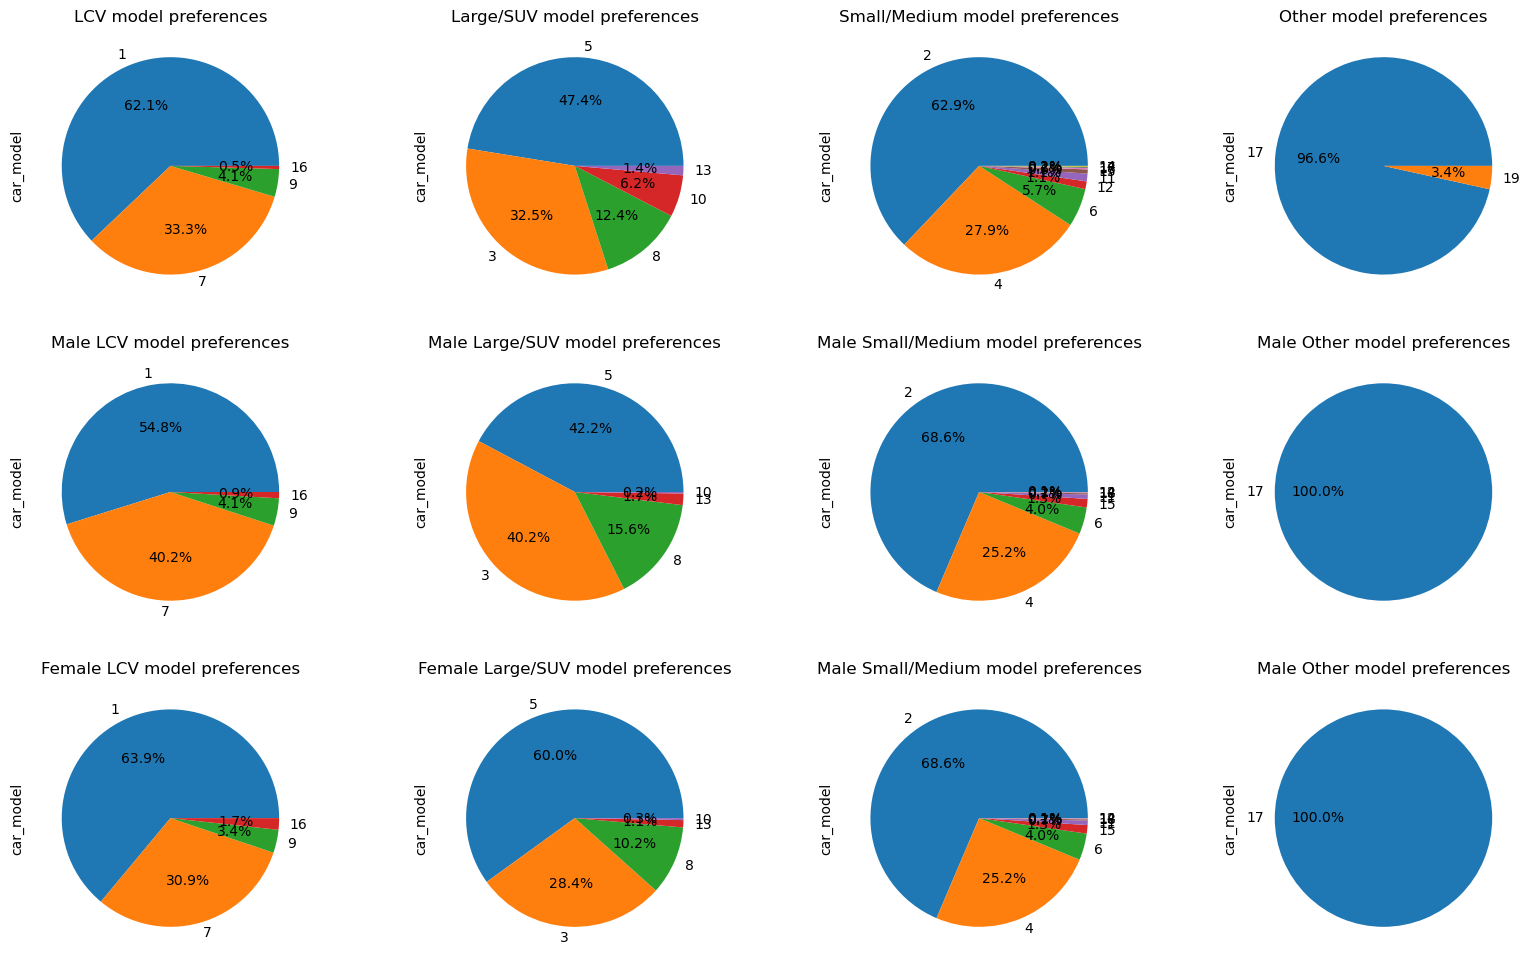

In [35]:
# Visualise rows with LCV = 1, display the frequency of each car_model in a bar chart.
fig, ax = plt.subplots(3, 4, figsize=(20, 12))

cars_NAG[cars_NAG['LCV'] == 1]['car_model'].value_counts().plot(kind='pie', title='LCV model preferences', ax=ax[0][0], autopct='%1.1f%%')
cars_NAG[cars_NAG['Large/SUV'] == 1]['car_model'].value_counts().plot(kind='pie', title='Large/SUV model preferences', ax=ax[0][1], autopct='%1.1f%%')
cars_NAG[cars_NAG['Small/Medium'] == 1]['car_model'].value_counts().plot(kind='pie', title='Small/Medium model preferences', ax=ax[0][2], autopct='%1.1f%%')
cars_NAG[cars_NAG['Other'] == 1]['car_model'].value_counts().plot(kind='pie', title='Other model preferences', ax=ax[0][3], autopct='%1.1f%%')

cars_ALL[(cars_ALL['LCV'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male LCV model preferences', ax=ax[1][0], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Large/SUV'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Large/SUV model preferences', ax=ax[1][1], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Small/Medium'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Small/Medium model preferences', ax=ax[1][2], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Other'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Other model preferences', ax=ax[1][3], autopct='%1.1f%%')

cars_ALL[(cars_ALL['LCV'] == 1) & (cars_ALL['Female'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Female LCV model preferences', ax=ax[2][0], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Large/SUV'] == 1) & (cars_ALL['Female'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Female Large/SUV model preferences', ax=ax[2][1], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Small/Medium'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Small/Medium model preferences', ax=ax[2][2], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Other'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Other model preferences', ax=ax[2][3], autopct='%1.1f%%')

plt.show()

> ##### Insights

- When not factoring age or gender, the cohort of interest preferences [ Large/SUV ] cars, with [ Small/Medium ] close behind.

- When factoring in gender, males preference [ Large/SUV ] vehicles, while females preference equal [ Small/Medium ] and [ Large/SUV ] vehicles, proportionate to the total in the dataset.

- There is not a lot of difference in model preferences between genders, although the small sample of females in the dataset prefer model [ 5 ] of [ Large/SUV ] vehicles, while males prefer both model [ 5 ] and [ 3 ].

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the influences of age and gender on the cohort of interest.

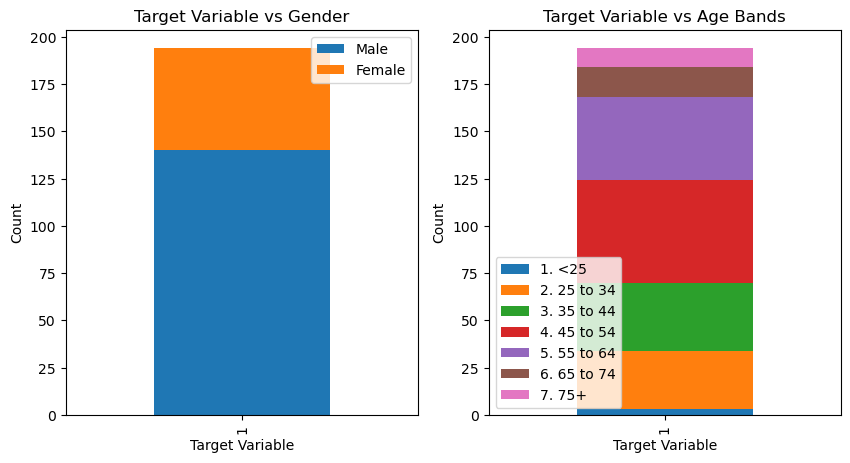

In [36]:
# Visualise only the values of 1 in the target column, against the 'Male' and 'Female' columns using a bar chart.
# Visualise only the values of 1 in the target column, against '1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+' columns using a bar chart.

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

cars_ALL[cars_ALL['Target'] == 1].groupby('Target')['Male', 'Female'].sum().plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Target Variable vs Gender')
ax[0].set_xlabel('Target Variable')
ax[0].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Target')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Target Variable vs Age Bands')
ax[1].set_xlabel('Target Variable')
ax[1].set_ylabel('Count')

plt.show()

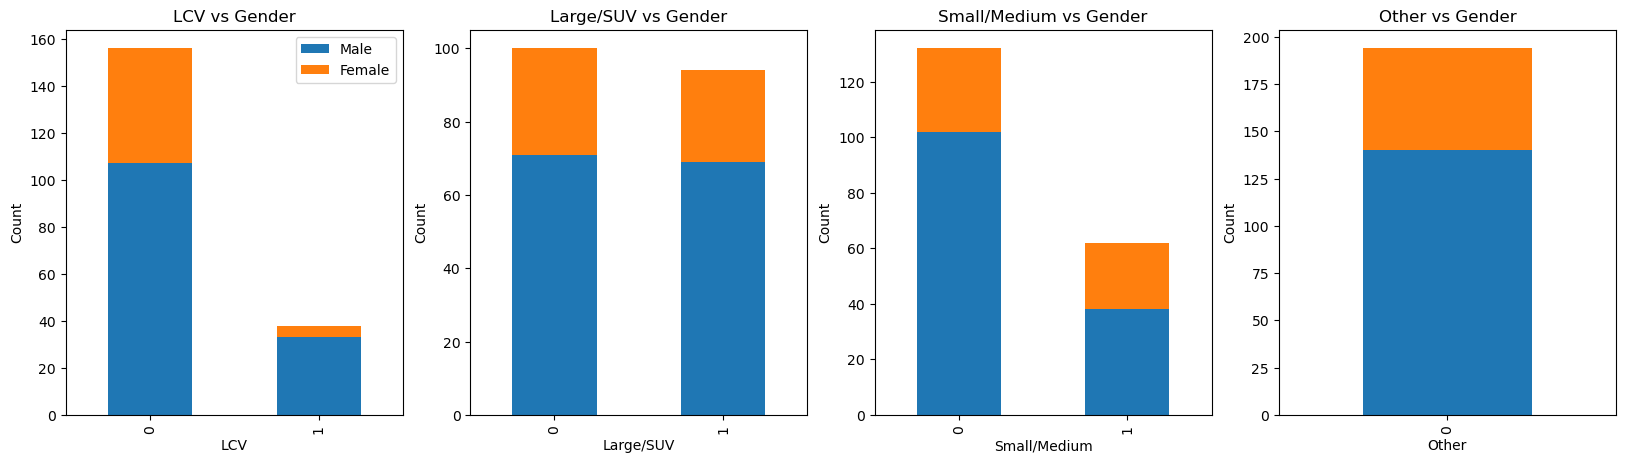

In [37]:
# Visualise the target variable with a value of 1, against LCV, Large/SUV, Small/Medium, and Other. Shown as percentages.

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

cars_ALL[cars_ALL['Target'] == 1].groupby('LCV')['Male', 'Female'].sum().plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('LCV vs Gender')
ax[0].set_xlabel('LCV')
ax[0].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Large/SUV')['Male', 'Female'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[1])
ax[1].set_title('Large/SUV vs Gender')
ax[1].set_xlabel('Large/SUV')
ax[1].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Small/Medium')['Male', 'Female'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[2])
ax[2].set_title('Small/Medium vs Gender')
ax[2].set_xlabel('Small/Medium')
ax[2].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Other')['Male', 'Female'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[3])
ax[3].set_title('Other vs Gender')
ax[3].set_xlabel('Other')
ax[3].set_ylabel('Count')

plt.show()

In [38]:
# Create a contingency table of the target variable and the Male column, with percentages.

pd.crosstab(cars_ALL['Target'], cars_ALL['Male'], normalize='index') * 100

Male,0,1
Target,,
0,44.305057,55.694943
1,27.835052,72.164948


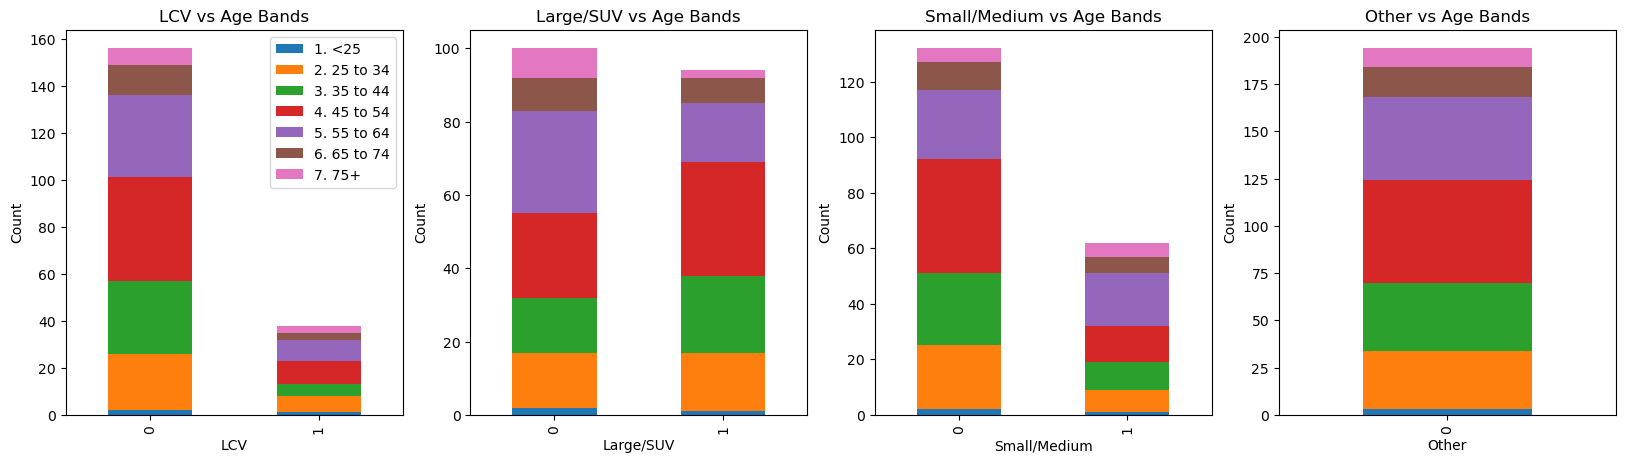

In [39]:
# Visualise the target variable with a value of 1, against LCV, Large/SUV, Small/Medium, and Other. Shown as percentages.

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

cars_ALL[cars_ALL['Target'] == 1].groupby('LCV')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('LCV vs Age Bands')
ax[0].set_xlabel('LCV')
ax[0].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Large/SUV')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[1])
ax[1].set_title('Large/SUV vs Age Bands')
ax[1].set_xlabel('Large/SUV')
ax[1].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Small/Medium')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[2])
ax[2].set_title('Small/Medium vs Age Bands')
ax[2].set_xlabel('Small/Medium')
ax[2].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Other')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[3])
ax[3].set_title('Other vs Age Bands')
ax[3].set_xlabel('Other')
ax[3].set_ylabel('Count')

plt.show()


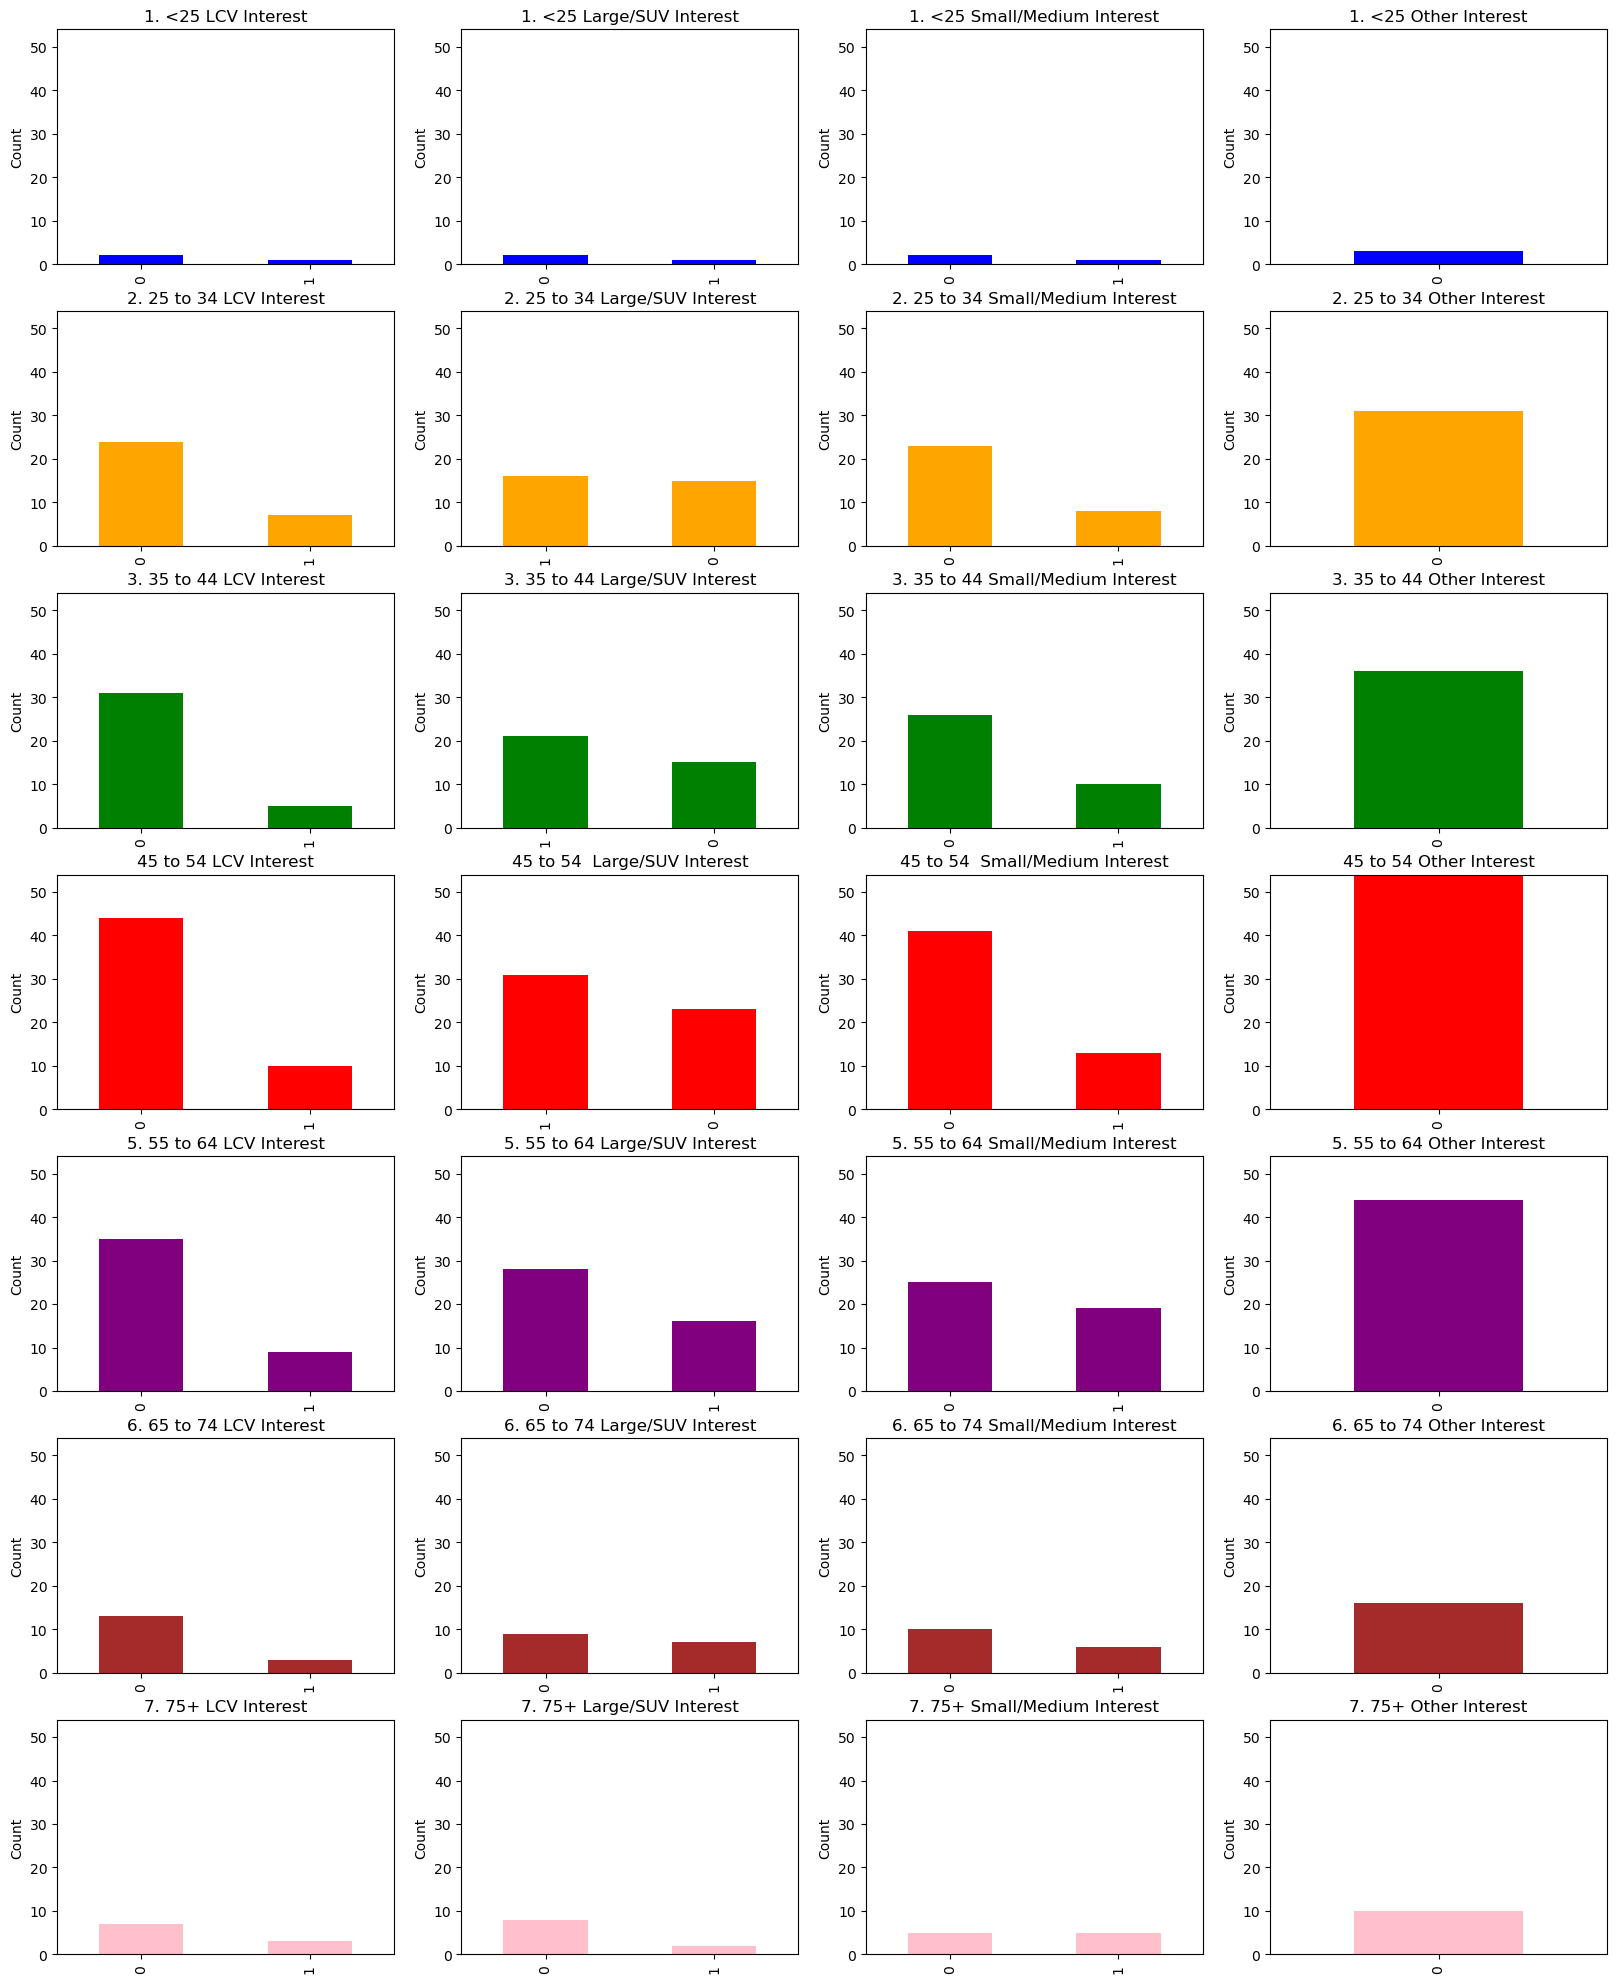

In [40]:
# For rows where Target = 1, and where corresponding age_bands = 1, display the frequency of 'LCV', 'Large/SUV', 'Small/Medium', 'Other' in a bar chart.

fig, ax = plt.subplots(7, 4, figsize=(20, 25))

max_y = cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['Other'].value_counts().max()
        
for i in range(7):
    for j in range(4):
        ax[i][j].set_ylim([0, max_y])
        ax[i][j].set_xticklabels(['No', 'Yes'], rotation=0)
        ax[i][j].set_ylabel('Count')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['1. <25'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[0][0], title='1. <25 LCV Interest', color='blue')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['1. <25'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[0][1], title='1. <25 Large/SUV Interest', color='blue')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['1. <25'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[0][2], title='1. <25 Small/Medium Interest', color='blue')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['1. <25'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[0][3], title='1. <25 Other Interest', color='blue')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['2. 25 to 34'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[1][0], title='2. 25 to 34 LCV Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['2. 25 to 34'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[1][1], title='2. 25 to 34 Large/SUV Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['2. 25 to 34'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[1][2], title='2. 25 to 34 Small/Medium Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['2. 25 to 34'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[1][3], title='2. 25 to 34 Other Interest', color='orange')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['3. 35 to 44'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[2][0], title='3. 35 to 44 LCV Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['3. 35 to 44'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[2][1], title='3. 35 to 44 Large/SUV Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['3. 35 to 44'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[2][2], title='3. 35 to 44 Small/Medium Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['3. 35 to 44'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[2][3], title='3. 35 to 44 Other Interest', color='green')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[3][0], title='45 to 54 LCV Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[3][1], title='45 to 54  Large/SUV Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[3][2], title='45 to 54  Small/Medium Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[3][3], title='45 to 54 Other Interest', color='red')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['5. 55 to 64'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[4][0], title='5. 55 to 64 LCV Interest', color='purple')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['5. 55 to 64'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[4][1], title='5. 55 to 64 Large/SUV Interest', color='purple')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['5. 55 to 64'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[4][2], title='5. 55 to 64 Small/Medium Interest', color='purple')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['5. 55 to 64'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[4][3], title='5. 55 to 64 Other Interest', color='purple')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['6. 65 to 74'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[5][0], title='6. 65 to 74 LCV Interest', color='brown')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['6. 65 to 74'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[5][1], title='6. 65 to 74 Large/SUV Interest', color='brown')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['6. 65 to 74'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[5][2], title='6. 65 to 74 Small/Medium Interest', color='brown')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['6. 65 to 74'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[5][3], title='6. 65 to 74 Other Interest', color='brown')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['7. 75+'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[6][0], title='7. 75+ LCV Interest', color='pink')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['7. 75+'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[6][1], title='7. 75+ Large/SUV Interest', color='pink')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['7. 75+'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[6][2], title='7. 75+ Small/Medium Interest', color='pink')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['7. 75+'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[6][3], title='7. 75+ Other Interest', color='pink')

plt.show()

> ##### Insights

- Men appear proportionately more likely to buy a second vehicle than females.

- The model most sought after by men is model [ 5 ] and [ 3 ] of [ Large/SUV ] vehicles.

- The highest age band of occurance is between 45 to 54, followed by 55 to 64.

- The most sought after car segment by 45 to 54 year olds is [ Large/SUV ] vehicles, while 55 to 64 year olds raise interest in [ Small/Medium ] vehicles. 

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the age of the vehicle, corresponding to an age brand.

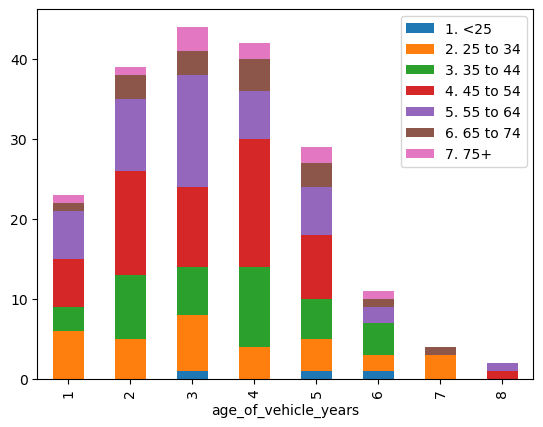

In [41]:
# Visualise how old the vehicles are before a specific age band decided to buy a new one.

cars_ALL[cars_ALL['Target'] == 1].groupby('age_of_vehicle_years')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True)
plt.show()

> ##### Insights

- While not conclusive , younger customers appear more likely to hold onto an existing vehicle, for longer.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the impact of servcing, age and total mileage on the cohort of interest.

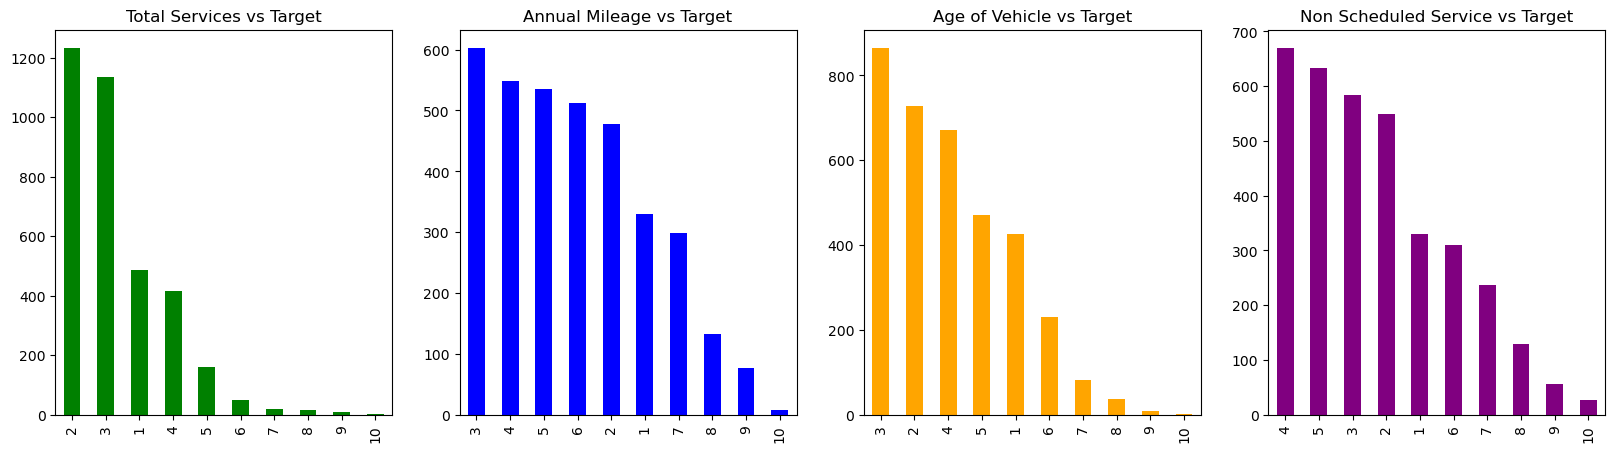

In [42]:
# Visualise total_services, annualised_mileage, age_of_vehicle and non_sched_serv_warr, against the target variable for casrs_NAG

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

cars_NAG[cars_NAG['Target'] == 1]['total_services'].value_counts().plot(kind='bar', title='Total Services vs Target', color='green', ax=ax[0])
cars_NAG[cars_NAG['Target'] == 1]['annualised_mileage'].value_counts().plot(kind='bar', title='Annual Mileage vs Target', color='blue', ax=ax[1])
cars_NAG[cars_NAG['Target'] == 1]['age_of_vehicle_years'].value_counts().plot(kind='bar', title='Age of Vehicle vs Target', color='orange', ax=ax[2])
cars_NAG[cars_NAG['Target'] == 1]['non_sched_serv_warr'].value_counts().plot(kind='bar', title='Non Scheduled Service vs Target', color='purple', ax=ax[3])

plt.show()

In [43]:
# Converting car_model back to a dummy variable for machine learning

cars_ALL = pd.get_dummies(cars_ALL, columns=['car_model'])
cars_NAG = pd.get_dummies(cars_NAG, columns=['car_model'])


> ##### Insights

- The least lower total services (deciles), the more likely a customer are to buy a new car from this dealership.

- While not conclusive, the more a customer has to non-routinely service their vehicle, after 4 services, the less likely they are to buy a new car from this dealership.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


 # Modelling



A multivariate classification model will now be created, as a simple univariate logistic regression model may not have been able to capture the complexity of the data and its relationship with the target. 

As a multivariate classification model can take into account multiple input variables and their interactions, it may potentially leading to improved predictive outcomes.

<br>
<br>
<br>

## Selecting a Performance Metric:

Like the univariate regression model, the selected metric for assessing the model is precision. 

This examines the proportion of true positives among all positive (predictions).

In this binary classification dillema, the positive predictions are customers who are more likely to purchase a new car.

Through optimising for precision, it reduces the liklihood of targeting the wrong customer.

<br>

An alternative metric, such as recall can be considered if precisons of models are similar.

Recall examines the proportion of true positives among all actual positive outcomes.

In this binary classification circumstance, a higher recall would mean more lost opportunities for the marketing campaign. 

<br>
<br>
<br>

### Viewing the shape of both dataframes

In [44]:
# Display the shape of both datasets.

# cars_ALL.shape
cars_ALL.shape

(18289, 43)

In [45]:
# cars_NAG.shape
cars_NAG.shape

(128611, 35)

### Multivariate Classification Modelling and Machine Learning
<hr>

### Splitting datasets into X and y 

In [46]:
# Split both datasets into X and y.

# Split the cars_ALL dataset into X and y.
y_ALL = cars_ALL.pop("Target").values
X_ALL = cars_ALL.values

# Split the cars_NAG dataset into X and y.
y_NAG = cars_NAG.pop("Target").values
X_NAG = cars_NAG.values


### Splitting the data into a training and testing set.

Data will be split prior to model construction. 80% of the data will be used for training, and 20% for testing.

As the  dataset is imbalanced, stratification will be integrated into each function.


In [47]:
# Establish a random state for reproducibility.
random_state = 100

# Set the test size.
test_size = 0.2

# Split the data into training and test sets, including stratification.
X_train_ALL, X_test_ALL, y_train_ALL, y_test_ALL = train_test_split(X_ALL, y_ALL, test_size=test_size, random_state=random_state, stratify=y_ALL)

# Split the data into training and test sets, including stratification.
X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG = train_test_split(X_NAG, y_NAG, test_size=test_size, random_state=random_state, stratify=y_NAG)



### Creating a function for Multivariate Classification.

In [48]:
def ML_results(X_train, X_test, y_train, y_test, model):

    # Standardise the data.
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    
    # Fit the model to the training data
    model.fit(X_train_s, y_train)
    
    # Make predictions on the training and test data
    y_train_pred = model.predict(X_train_s)
    y_test_pred = model.predict(X_test_s)
    

    # Display a Confusion matrix, accuracy score and f1 score.
    cm_train = confusion_matrix(y_train, y_train_pred)
    ac_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    cm_test = confusion_matrix(y_test, y_test_pred)
    ac_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')


    print("Confusion matrix (training set): ")
    print(cm_train)
    print('\n')
    print("Confusion matrix (testing set): ")
    print(cm_test)
    print('\n')

    print("Accuracy (training set): ", ac_train)
    print("Accuracy (testing set): ", ac_test)
    print('\n')
    print("F1 score (training set): ", f1_train)
    print("F1 score (testing set): ", f1_test)
    print('\n')
    

    # Calculate precision and recall.
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
        
    print("Precision (training set): ", precision_train)
    print("Recall (training set): ", recall_train)
    print('\n')
    print("Precision (testing set): ", precision_test)
    print("Recall (testing set): ", recall_test)
    print('\n')
    

    # Calculate recall and precision results.
    if hasattr(model, "predict_proba"):  
        y_scores = model.predict_proba(X_test_s)[:, 1]
    else:  
        y_scores = model.decision_function(X_test_s)
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    
    # Create an empty dataframe that lists the precision.
    results = pd.DataFrame({
        'Precision': precision,
        'Recall': recall,
    })
    
    ('/n')

    # Visualise the test data Precision-Recall curve, and recall the results of the dataframe.
    plt.plot(recall, precision, label='Precision-Recall Curve', color='red', linewidth=2, alpha=0.8)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

    display("0.75 Precision",results[(results["Precision"]<0.76) & (results["Precision"]>0.75)])
    display("0.8 Precision",results[(results["Precision"]<0.81) & (results["Precision"]>0.8)])
    display("0.85 Precision",results[(results["Precision"]<0.86) & (results["Precision"]>0.85)])
    display("0.9 Precision",results[(results["Precision"]<0.91) & (results["Precision"]>0.9)])
    display("0.95 Precision",results[(results["Precision"]<0.96) & (results["Precision"]>0.95)])






### Baseline (Null accuracy)

Precision in this model is not adequately-defined, as it requires both true positives and false positives to be useful. 

As the majority of the data in the cohort of interest is negative (0 value), the null accuracy would equal the proportion of negative samples.

<br>
<br>
<br>

### Training multivariate logistic regression with the cars_ALL dataframe

Confusion matrix (training set): 
[[14457    19]
 [  108    47]]


Confusion matrix (testing set): 
[[3615    4]
 [  30    9]]


Accuracy (training set):  0.9913198004237578
Accuracy (testing set):  0.9907053034445052


F1 score (training set):  0.9895852782441564
F1 score (testing set):  0.9883982635368017


Precision (training set):  0.712
Recall (training set):  0.303


Precision (testing set):  0.692
Recall (testing set):  0.231




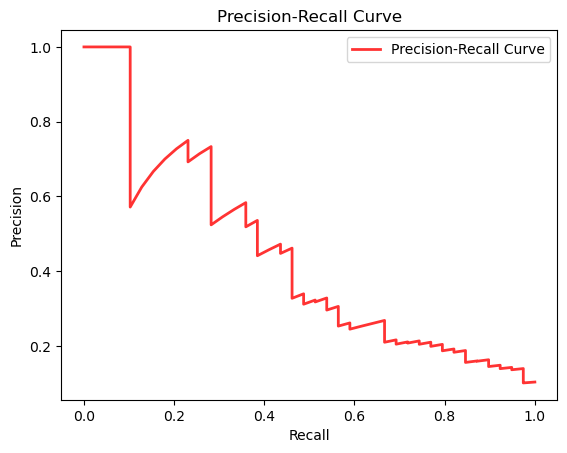

'0.75 Precision'

,Precision,Recall


'0.8 Precision'

,Precision,Recall


'0.85 Precision'

,Precision,Recall


'0.9 Precision'

,Precision,Recall


'0.95 Precision'

,Precision,Recall


In [69]:
# Fit a logistic regression with all the variables of the dataset (with age and gender)
ML_results(X_train_ALL, X_test_ALL, y_train_ALL, y_test_ALL, LogisticRegression(multi_class='multinomial'))

<br>
<br>

> ##### Insights

Precision: 0.692

Recall: 0.231

<br>
<br>
<br>

### Training a multivariate logistic regression with the cars_NAG dataframe.

Confusion matrix (training set): 
[[99951   120]
 [ 2193   624]]


Confusion matrix (testing set): 
[[24991    28]
 [  563   141]]


Accuracy (training set):  0.977519244226732
Accuracy (testing set):  0.9770244528243206


F1 score (training set):  0.9710910026891002
F1 score (testing set):  0.9701059347841569


Precision (training set):  0.839
Recall (training set):  0.222


Precision (testing set):  0.834
Recall (testing set):  0.2




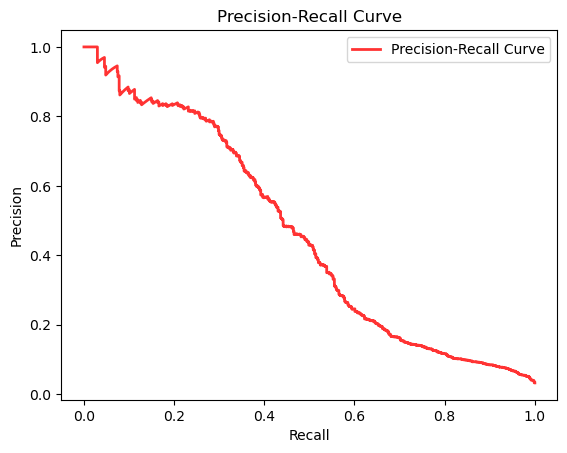

'0.75 Precision'

,Precision,Recall
21193,0.750890,0.299716
21194,0.753571,0.299716
21195,0.756272,0.299716
21196,0.758993,0.299716
21197,0.758123,0.298295


'0.8 Precision'

,Precision,Recall
21248,0.800885,0.257102
21249,0.804444,0.257102
21250,0.803571,0.255682
21251,0.807175,0.255682
21253,0.809955,0.254261
21254,0.809091,0.252841
21259,0.809302,0.247159
21260,0.808411,0.245739


'0.85 Precision'

,Precision,Recall
21351,0.853659,0.149148
21352,0.852459,0.147727
21353,0.851240,0.146307
21378,0.854167,0.116477
21379,0.852632,0.115057
21380,0.851064,0.113636
21382,0.858696,0.112216


'0.9 Precision'

,Precision,Recall
21413,0.901639,0.078125


'0.95 Precision'

,Precision,Recall
21450,0.958333,0.03267
21451,0.956522,0.03125
21452,0.954545,0.02983


In [50]:
# Fit a logistic regression with all the variables of the dataset without age and gender.
ML_results(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, LogisticRegression(multi_class='multinomial'))

<br>
<br>

> ##### Insights

Precision: 0.834

Recall: 0.2

<br>
<br>
<br>

### Shifting Focus onto cars_NAG through Hyperparameter Tuning

In [51]:
def ML_results_cv(X_train, X_test, y_train, y_test, hyperparameters_dict, model, search_type="grid"):
    
    # Standardise the data.
    scaler = StandardScaler()

    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    


    # Define the hyperparameters.
    hyperparameters = hyperparameters_dict
    
    if search_type == "grid":
        # Grid search
        search = GridSearchCV(model, hyperparameters, cv=5, n_jobs=-1)
    elif search_type == "random":
        # Randomized search
        search = RandomizedSearchCV(model, hyperparameters, cv=5, n_jobs=-1)
    else:
        raise ValueError("Invalid. Select 'grid' or 'random'.")
    


    # Fit the search to the training data.
    search.fit(X_train_s, y_train)
    
    # Make predictions on the training and test data using the best model found by the search.
    model = search.best_estimator_

    print("Best performing parameters: ",model)
    
    y_train_pred = model.predict(X_train_s)
    y_test_pred = model.predict(X_test_s)
    


    # Display a Confusion matrix, accuracy score and f1 score.
    cm_train = confusion_matrix(y_train, y_train_pred)
    ac_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    cm_test = confusion_matrix(y_test, y_test_pred)
    ac_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')


    print("Confusion matrix (training set): ")
    print(cm_train)
    print('\n')
    print("Confusion matrix (testing set): ")
    print(cm_test)
    print('\n')

    print("Accuracy (training set): ", ac_train)
    print("Accuracy (testing set): ", ac_test)
    print('\n')
    print("F1 score (training set): ", f1_train)
    print("F1 score (testing set): ", f1_test)
    print('\n')
    



    # Calculate precision and recall.
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
        
    print("Precision (training set): ", precision_train)
    print("Recall (training set): ", recall_train)
    print('\n')
    print("Precision (testing set): ", precision_test)
    print("Recall (testing set): ", recall_test)
    print('\n')
    
    
    # Calculate recall and precision results.
    if hasattr(model, "predict_proba"):  
        y_scores = model.predict_proba(X_test_s)[:, 1]
    else: 
        y_scores = model.decision_function(X_test_s)
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    

    # Create an empty dataframe that lists the precision.
    results = pd.DataFrame({
        'Precision': precision,
        'Recall': recall,
    })
    
    ('/n')

    # Visualise the test data Precision-Recall curve, and recall the results of the dataframe.
    plt.plot(recall, precision, label='Precision-Recall Curve', color='red', linewidth=2, alpha=0.7)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

    display("0.75 Precision",results[(results["Precision"]<0.76) & (results["Precision"]>0.75)])
    display("0.8 Precision",results[(results["Precision"]<0.81) & (results["Precision"]>0.8)])
    display("0.85 Precision",results[(results["Precision"]<0.86) & (results["Precision"]>0.85)])
    display("0.9 Precision",results[(results["Precision"]<0.91) & (results["Precision"]>0.9)])
    display("0.95 Precision",results[(results["Precision"]<0.96) & (results["Precision"]>0.95)])

Best performing parameters:  LogisticRegression(C=0.1, multi_class='multinomial')
Confusion matrix (training set): 
[[99952   119]
 [ 2202   615]]


Confusion matrix (testing set): 
[[24992    27]
 [  568   136]]


Accuracy (training set):  0.9774414897752897
Accuracy (testing set):  0.9768689499669556


F1 score (training set):  0.9709413123831198
F1 score (testing set):  0.9697758755341663


Precision (training set):  0.838
Recall (training set):  0.218


Precision (testing set):  0.834
Recall (testing set):  0.193




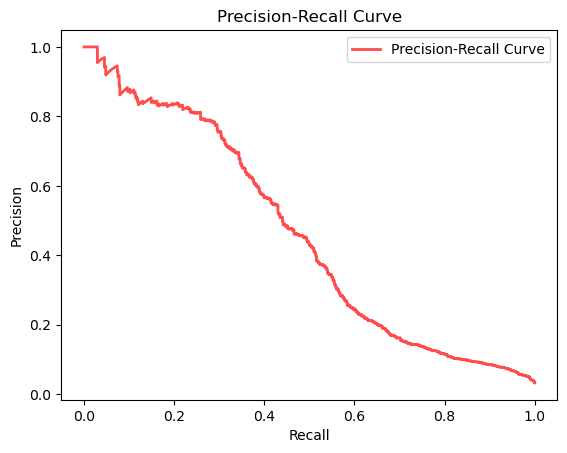

'0.75 Precision'

,Precision,Recall
21147,0.750877,0.303977
21148,0.753521,0.303977
21149,0.756184,0.303977
21150,0.755319,0.302557
21151,0.754448,0.301136
21152,0.757143,0.301136
21153,0.756272,0.299716
21154,0.755396,0.298295
21155,0.754513,0.296875
21156,0.757246,0.296875


'0.8 Precision'

,Precision,Recall
21205,0.801762,0.258523
21206,0.805310,0.258523
21207,0.808889,0.258523
21211,0.809955,0.254261
21212,0.809091,0.252841
21213,0.808219,0.251420
21217,0.809302,0.247159
21218,0.808411,0.245739
21222,0.809524,0.241477


'0.85 Precision'

,Precision,Recall
21309,0.853659,0.149148
21310,0.852459,0.147727
21311,0.851240,0.146307
21335,0.855670,0.117898
21336,0.854167,0.116477
21337,0.852632,0.115057


'0.9 Precision'

,Precision,Recall
21371,0.901639,0.078125


'0.95 Precision'

,Precision,Recall
21408,0.958333,0.03267
21409,0.956522,0.03125
21410,0.954545,0.02983


In [73]:
# Create hyperparameter dictionary.
hyperparameters_dict = {
    'C': [0.001, 0.01, 0.1],
    'penalty': ['l2']
    }

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, LogisticRegression(multi_class='multinomial'), search_type="grid")

<br>
<br>

> ##### Insights

Precision: 0.834

Recall: 0.193

<br>
<br>
<br>

Best performing parameters:  LogisticRegression(C=0.7, multi_class='multinomial')
Confusion matrix (training set): 
[[99951   120]
 [ 2193   624]]


Confusion matrix (testing set): 
[[24991    28]
 [  563   141]]


Accuracy (training set):  0.977519244226732
Accuracy (testing set):  0.9770244528243206


F1 score (training set):  0.9710910026891002
F1 score (testing set):  0.9701059347841569


Precision (training set):  0.839
Recall (training set):  0.222


Precision (testing set):  0.834
Recall (testing set):  0.2




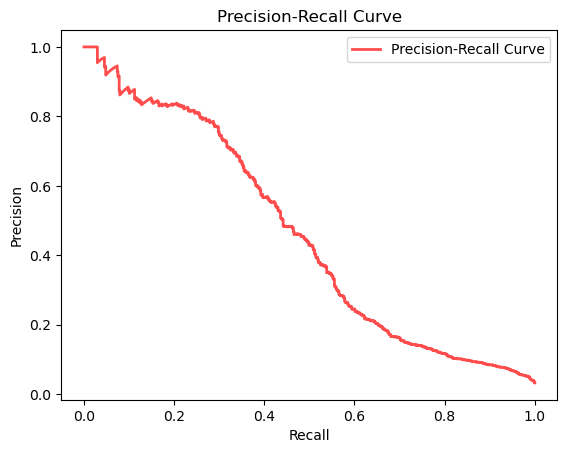

'0.75 Precision'

,Precision,Recall
21198,0.750890,0.299716
21199,0.753571,0.299716
21200,0.756272,0.299716
21201,0.755396,0.298295
21202,0.758123,0.298295


'0.8 Precision'

,Precision,Recall
21253,0.800885,0.257102
21254,0.804444,0.257102
21255,0.803571,0.255682
21256,0.807175,0.255682
21258,0.809955,0.254261
21259,0.809091,0.252841
21260,0.808219,0.251420
21264,0.809302,0.247159
21265,0.808411,0.245739


'0.85 Precision'

,Precision,Recall
21356,0.853659,0.149148
21357,0.852459,0.147727
21358,0.851240,0.146307
21383,0.854167,0.116477
21384,0.852632,0.115057
21385,0.851064,0.113636
21387,0.858696,0.112216


'0.9 Precision'

,Precision,Recall
21418,0.901639,0.078125


'0.95 Precision'

,Precision,Recall
21455,0.958333,0.03267
21456,0.956522,0.03125
21457,0.954545,0.02983


In [74]:
# Create a hyperparameter dictionary.
hyperparameters_dict = {
    'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'penalty': ['l2']
    }

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, LogisticRegression(multi_class='multinomial'), search_type="grid")

<br>
<br>

> ##### Insights

Precision: 0.834

Recall: 0.2

<br>
<br>
<br>

Best performing parameters:  LogisticRegression(C=1, multi_class='multinomial')
Confusion matrix (training set): 
[[99951   120]
 [ 2191   626]]


Confusion matrix (testing set): 
[[24991    28]
 [  563   141]]


Accuracy (training set):  0.9775386828395926
Accuracy (testing set):  0.9770244528243206


F1 score (training set):  0.9711258636045393
F1 score (testing set):  0.9701059347841569


Precision (training set):  0.839
Recall (training set):  0.222


Precision (testing set):  0.834
Recall (testing set):  0.2




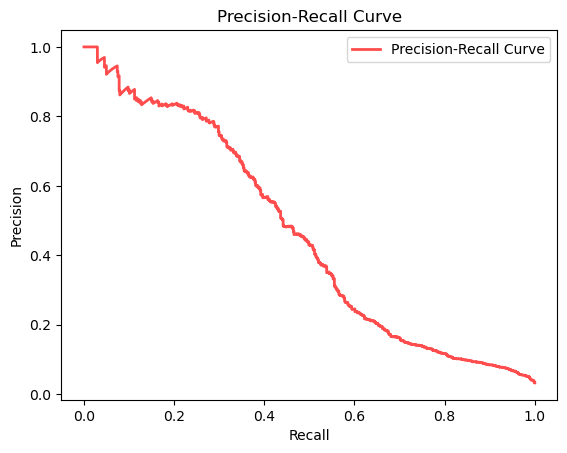

'0.75 Precision'

,Precision,Recall
21201,0.750890,0.299716
21202,0.753571,0.299716
21203,0.756272,0.299716
21204,0.755396,0.298295
21205,0.758123,0.298295


'0.8 Precision'

,Precision,Recall
21256,0.800885,0.257102
21257,0.804444,0.257102
21258,0.803571,0.255682
21259,0.807175,0.255682
21261,0.809955,0.254261
21262,0.809091,0.252841
21263,0.808219,0.251420
21267,0.809302,0.247159
21268,0.808411,0.245739


'0.85 Precision'

,Precision,Recall
21359,0.853659,0.149148
21360,0.852459,0.147727
21361,0.851240,0.146307
21386,0.854167,0.116477
21387,0.852632,0.115057
21388,0.851064,0.113636
21390,0.858696,0.112216


'0.9 Precision'

,Precision,Recall
21421,0.901639,0.078125


'0.95 Precision'

,Precision,Recall
21458,0.958333,0.03267
21459,0.956522,0.03125
21460,0.954545,0.02983


In [75]:
# Create a hyperparameter dictionary
hyperparameters_dict = {
    'C': [1, 2, 3, 4, 5, 10],
    'penalty': ['l2']
    }

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, LogisticRegression(multi_class='multinomial'), search_type="grid")

<br>
<br>

> ##### Insights

Precision: 0.834

Recall: 0.2

<br>
<br>
<br>

Best performing parameters:  LogisticRegression(C=0.3, class_weight='balanced', multi_class='multinomial')
Confusion matrix (training set): 
[[78655 21416]
 [  349  2468]]


Confusion matrix (testing set): 
[[19622  5397]
 [   86   618]]


Accuracy (training set):  0.78845929554467
Accuracy (testing set):  0.7868444582669206


F1 score (training set):  0.8594685622315702
F1 score (testing set):  0.8584330041022685


Precision (training set):  0.103
Recall (training set):  0.876


Precision (testing set):  0.103
Recall (testing set):  0.878




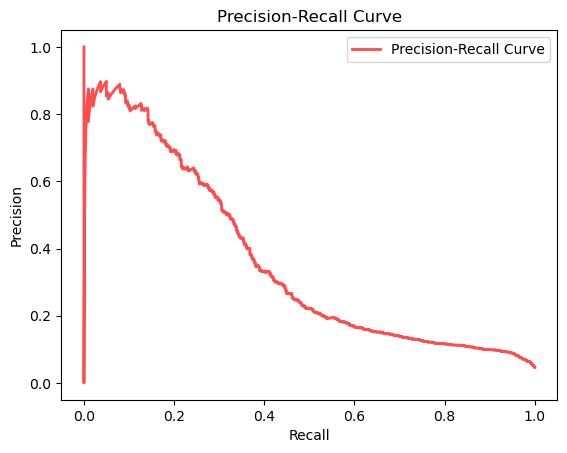

'0.75 Precision'

,Precision,Recall
15090,0.751678,0.159091
15092,0.755102,0.157670


'0.8 Precision'

,Precision,Recall
15115,0.806452,0.142045
15150,0.808989,0.102273


'0.85 Precision'

,Precision,Recall
15163,0.855263,0.092330
15164,0.853333,0.090909
15190,0.857143,0.059659
15191,0.854167,0.058239
15192,0.851064,0.056818
15197,0.857143,0.051136
15198,0.853659,0.049716
15218,0.857143,0.025568
15225,0.857143,0.017045
15232,0.857143,0.008523


'0.9 Precision'

,Precision,Recall


'0.95 Precision'

,Precision,Recall


In [76]:
# Create a hyperparameter dictionary
hyperparameters_dict = {
    'C': [0.1, 0.3, 0.5, 1, 2, 3],
    'penalty': ['l2'],
    'class_weight': ['balanced']
}

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, LogisticRegression(multi_class='multinomial'), search_type="grid")

<br>
<br>

> ##### Insights

Precision: 0.103

Recall: 0.878

<br>
<br>
<br>

Best performing parameters:  LogisticRegression(multi_class='multinomial', penalty='none')
Confusion matrix (training set): 
[[99951   120]
 [ 2190   627]]


Confusion matrix (testing set): 
[[24991    28]
 [  563   141]]


Accuracy (training set):  0.9775484021460229
Accuracy (testing set):  0.9770244528243206


F1 score (training set):  0.9711432834631113
F1 score (testing set):  0.9701059347841569


Precision (training set):  0.839
Recall (training set):  0.223


Precision (testing set):  0.834
Recall (testing set):  0.2




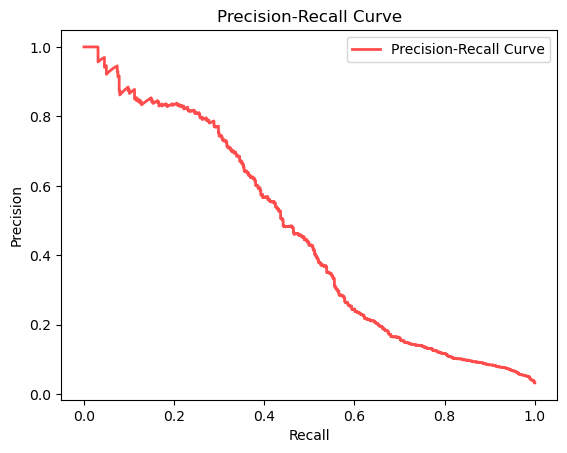

'0.75 Precision'

,Precision,Recall
21211,0.750890,0.299716
21212,0.753571,0.299716
21213,0.752688,0.298295
21214,0.755396,0.298295
21215,0.758123,0.298295


'0.8 Precision'

,Precision,Recall
21266,0.800885,0.257102
21267,0.804444,0.257102
21268,0.803571,0.255682
21269,0.807175,0.255682
21271,0.809955,0.254261
21272,0.809091,0.252841
21273,0.808219,0.251420
21274,0.807339,0.250000
21277,0.809302,0.247159
21278,0.808411,0.245739


'0.85 Precision'

,Precision,Recall
21369,0.853659,0.149148
21370,0.852459,0.147727
21371,0.851240,0.146307
21396,0.854167,0.116477
21397,0.852632,0.115057
21398,0.851064,0.113636
21400,0.858696,0.112216


'0.9 Precision'

,Precision,Recall
21431,0.901639,0.078125


'0.95 Precision'

,Precision,Recall
21468,0.958333,0.03267
21469,0.956522,0.03125


In [77]:
# Create a hyperparameter dictionary.
hyperparameters_dict = {
    'penalty': ['none']
    }

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, LogisticRegression(multi_class='multinomial'), search_type="grid")

/Users/nate/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/nate/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/nate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nate/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

Best performing parameters:  LogisticRegression(C=0.1, multi_class='multinomial', penalty='none')
Confusion matrix (training set): 
[[99951   120]
 [ 2190   627]]


Confusion matrix (testing set): 
[[24991    28]
 [  563   141]]


Accuracy (training set):  0.9775484021460229
Accuracy (testing set):  0.9770244528243206


F1 score (training set):  0.9711432834631113
F1 score (testing set):  0.9701059347841569


Precision (training set):  0.839
Recall (training set):  0.223


Precision (testing set):  0.834
Recall (testing set):  0.2




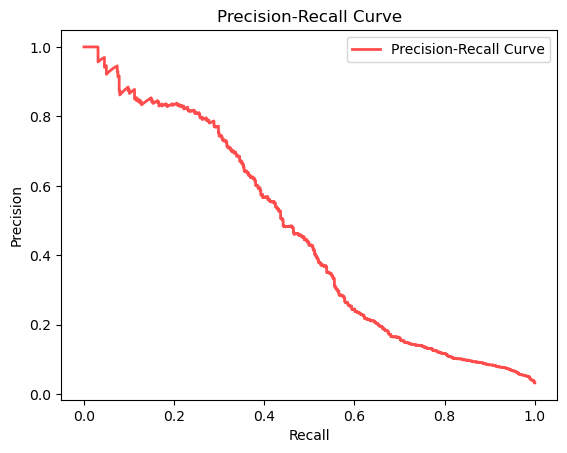

'0.75 Precision'

,Precision,Recall
21211,0.750890,0.299716
21212,0.753571,0.299716
21213,0.752688,0.298295
21214,0.755396,0.298295
21215,0.758123,0.298295


'0.8 Precision'

,Precision,Recall
21266,0.800885,0.257102
21267,0.804444,0.257102
21268,0.803571,0.255682
21269,0.807175,0.255682
21271,0.809955,0.254261
21272,0.809091,0.252841
21273,0.808219,0.251420
21274,0.807339,0.250000
21277,0.809302,0.247159
21278,0.808411,0.245739


'0.85 Precision'

,Precision,Recall
21369,0.853659,0.149148
21370,0.852459,0.147727
21371,0.851240,0.146307
21396,0.854167,0.116477
21397,0.852632,0.115057
21398,0.851064,0.113636
21400,0.858696,0.112216


'0.9 Precision'

,Precision,Recall
21431,0.901639,0.078125


'0.95 Precision'

,Precision,Recall
21468,0.958333,0.03267
21469,0.956522,0.03125


In [78]:
# Create a hyperparameter dictionary.
hyperparameters_dict = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 0.5, 1.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],

}

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, LogisticRegression(multi_class='multinomial'), search_type="random")

<br>
<br>

> ##### Insights

Despite examining the influence of a variety of hyperparameters, the precision rate has not improved beyond 0.84.

It is presumed time would be best allocated exploring other algorithms and models.

This time was fortunately not wasted, as it was discovered that the class_weight hyperparameter can have a significant impact on the model's performance.

The hyperparameters explored suggest a models with higher variance and lower bias would be wise.

<br>
<br>

## Reflecting on the value of each feature: Examining Coefficients

#### Examining the coefficients of cars_ALL

In [80]:
# Appropriate the logistic regression model with parameters for coefficient interpretation.
clf = LogisticRegression(multi_class='multinomial', intercept_scaling=0.5, penalty='none',max_iter=10000)
clf.fit(X_ALL, y_ALL)

# Acquire coefficients and importance values.
coefs = np.abs(clf.coef_[0])

# Create an empty dataframe to store the coefficients and feature names.
data = {'Feature': cars_ALL.columns, 'Coefficient': coefs}
df = pd.DataFrame(data)

df_coefficients_ALL = df.sort_values(by="Coefficient", ascending=False).reset_index().drop("index",axis=1)
df_coefficients_ALL

,Feature,Coefficient
0,car_model_12,4.405482
1,car_model_6,3.921205
2,car_model_11,3.645485
3,car_model_2,3.403269
4,car_model_4,3.141900
5,car_model_18,2.848971
6,car_model_16,1.835905
7,Small/Medium,1.796683
8,Large/SUV,1.384987
9,car_model_7,1.130937


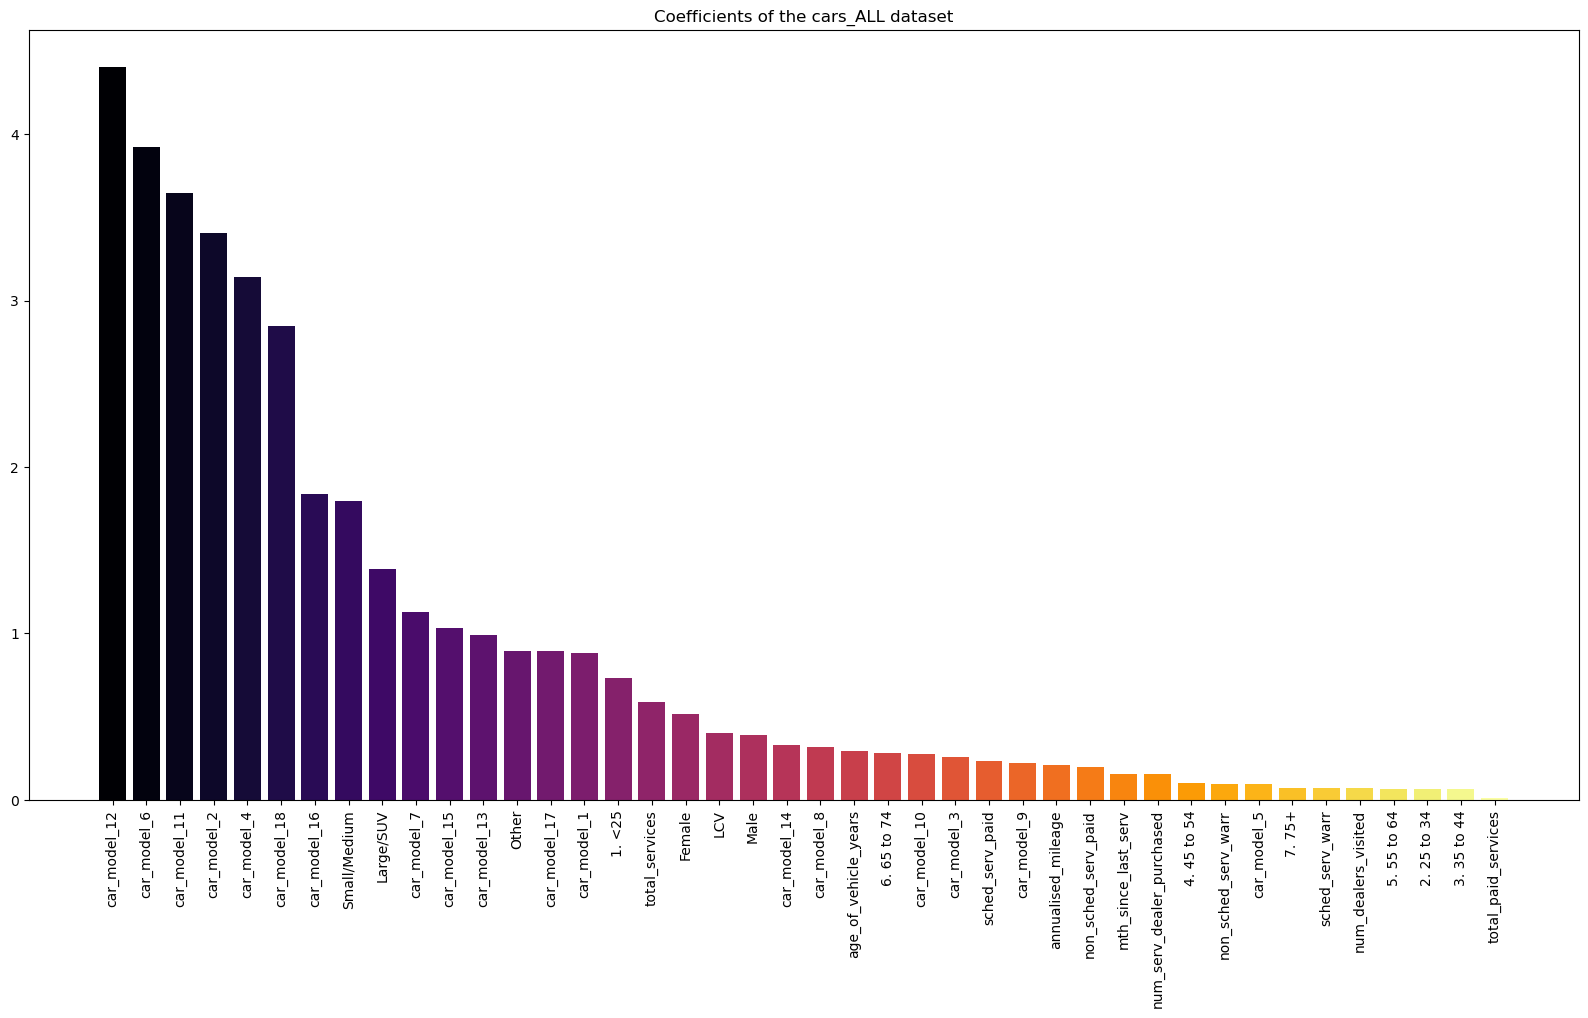

In [81]:
# Visualise the coefficients of the cars_NAG dataset.
plt.figure(figsize=(20,10))

# Define the color map.
cmap = cm.get_cmap('inferno')

# Create a normalised array of values from 0 to 1 based on the number of bars.
colors = cmap(np.linspace(0, 1, len(df_coefficients_ALL)))

# Plot the bar chart with the specified color map.
plt.bar(df_coefficients_ALL["Feature"], df_coefficients_ALL["Coefficient"], color=colors)
plt.xticks(rotation=90)
plt.title("Coefficients of the cars_ALL dataset")
plt.show()


In [60]:
# Determine the value of the age and gender features by their position in the dataframe.
display(df_coefficients_ALL[df_coefficients_ALL.Feature.isin(["1. <25","2. 25 to 34","3. 35 to 44","4. 45 to 54","5. 55 to 64", "6. 65 to 74","7. 75+","Male","Female"])])


,Feature,Coefficient
15,1. <25,1.536913
17,Female,1.288660
19,Male,1.035475
24,6. 65 to 74,0.638838
33,5. 55 to 64,0.207684
34,3. 35 to 44,0.202198
38,4. 45 to 54,0.136136
39,7. 75+,0.066383
40,2. 25 to 34,0.058978


#### Examining the coefficients of cars_NAG

In [82]:
# Appropriate the logistic regression model with parameters for coefficient interpretation.
clf = LogisticRegression(multi_class='multinomial', intercept_scaling=0.5, penalty='none',max_iter=10000)
clf.fit(X_NAG, y_NAG)

# Acquire coefficients and importance values.
coefs = np.abs(clf.coef_[0])

# Create an empty dataframe to store the coefficients and feature names.
data = {'Feature': cars_NAG.columns, 'Coefficient': coefs}
df_coefficients_NAG = pd.DataFrame(data)

# Display the table
df_coefficients_NAG.sort_values(by="Coefficient", ascending=False).reset_index().drop("index",axis=1)

,Feature,Coefficient
0,car_model_14,2.124158
1,car_model_15,1.012791
2,car_model_10,0.709839
3,car_model_2,0.586941
4,Small/Medium,0.582599
5,car_model_4,0.558469
6,car_model_17,0.511780
7,car_model_11,0.462154
8,total_services,0.456573
9,car_model_13,0.436489


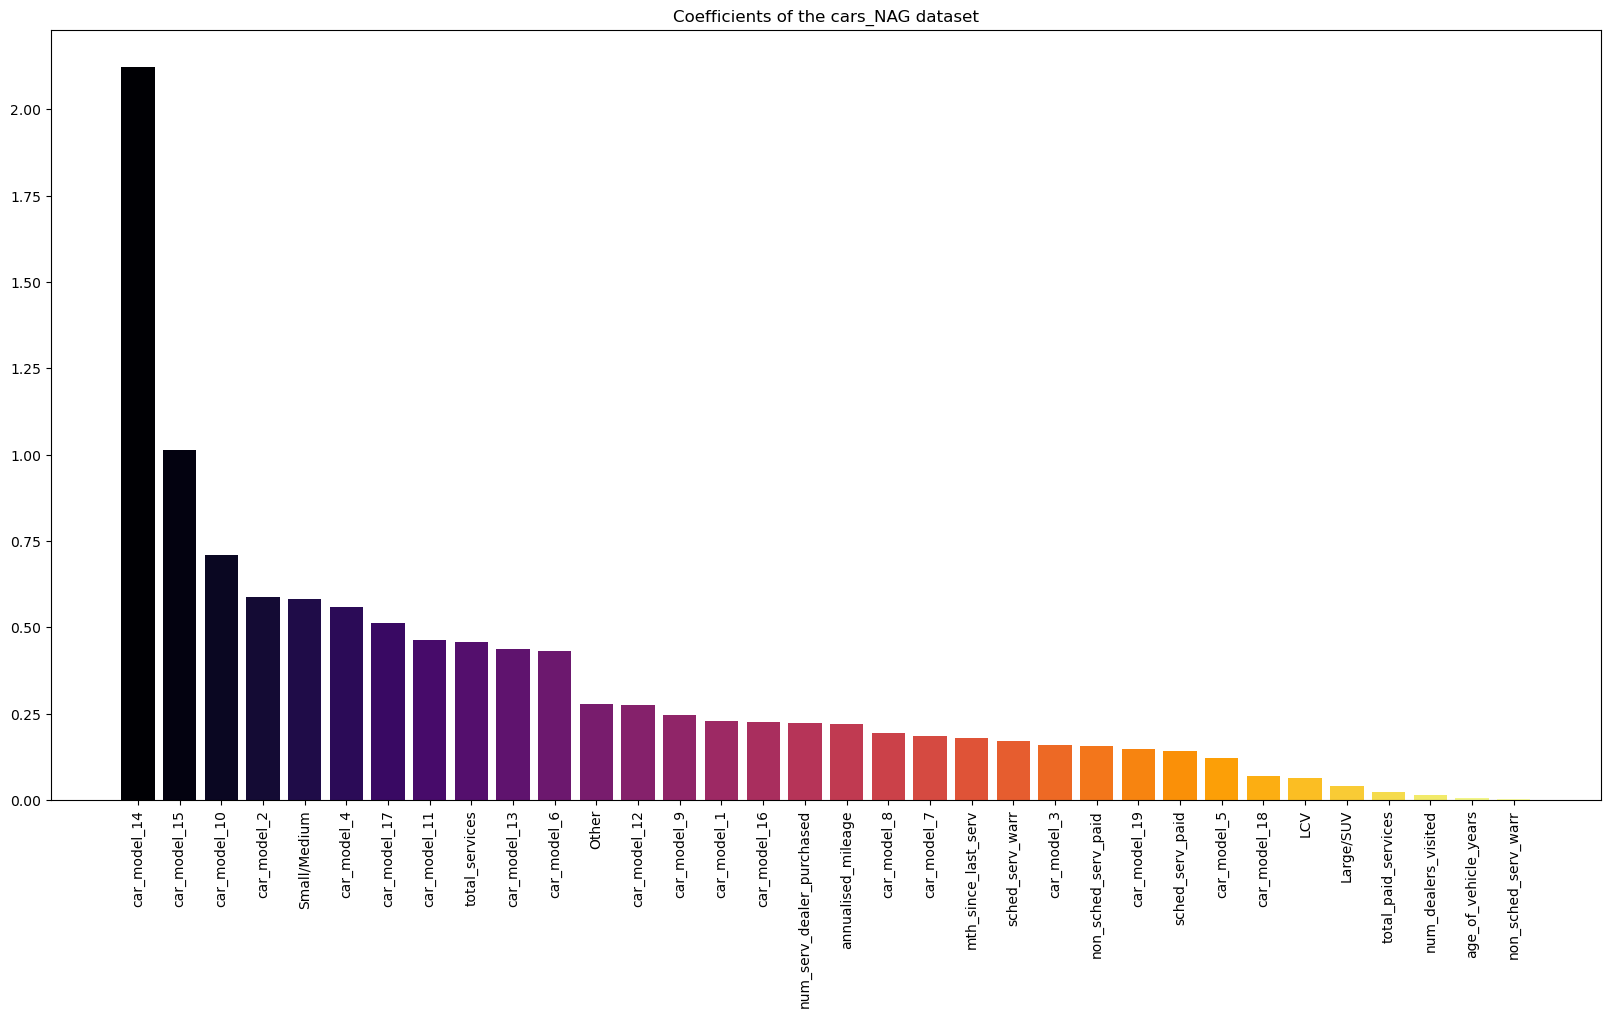

In [83]:
# Visualise the coefficients of the cars_NAG dataset.
plt.figure(figsize=(20,10))

# Define the color map.
cmap = cm.get_cmap('inferno')

# Create a normalised array of values from 0 to 1 based on the number of bars.
colors = cmap(np.linspace(0, 1, len(df_coefficients_NAG)))

# Sort the dataframe by feature importance in descending order
df_sorted = df_coefficients_NAG.sort_values(by="Coefficient", ascending=False)

# Plot the bar chart with the specified color map.
plt.bar(df_sorted["Feature"], df_sorted["Coefficient"], color=colors)
plt.xticks(rotation=90)
plt.title("Coefficients of the cars_NAG dataset")
plt.show()

<hr>
<br>

**End of notebook 2.**